In [8]:
import torch
x=torch.zeros(5,3,dtype=torch.long)
print(x)

tensor([[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]])


## Chapter1 basic

In [9]:
x = x.new_ones(5, 3, dtype=torch.float64)  # 返回的tensor默认具有相同的torch.dtype和torch.device
print(x)

x = torch.randn_like(x, dtype=torch.float) # 指定新的数据类型
print(x) 

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], dtype=torch.float64)
tensor([[-1.2150,  0.8873,  0.3499],
        [-1.9114, -0.0517,  0.3378],
        [ 0.4350,  0.4694, -0.5147],
        [ 1.4708,  0.6588,  0.9315],
        [-0.1037,  0.2000,  0.2880]])


In [10]:
print(x.size())
print(x.shape)

torch.Size([5, 3])
torch.Size([5, 3])


In [12]:
y=torch.rand(5,3)
result = torch.empty(5, 3)
torch.add(x, y, out=result)
print(result)

tensor([[-0.4725,  1.0031,  1.2732],
        [-1.2579,  0.6610,  0.9154],
        [ 0.9158,  1.1909, -0.0454],
        [ 2.4033,  1.0596,  1.0840],
        [ 0.6713,  0.3796,  0.3919]])


In [18]:
y = x.view(15)
z = x.view(-1, 5)  # -1所指的维度可以根据其他维度的值推出来（即保持总数不变）
y=y.view(1,3,-1)
print(x.size(), y.size(), z.size())
#注意view()返回的新Tensor与源Tensor虽然可能有不同的size，但是是共享data的，也即更改其中的一个，另外一个也会跟着改变。(顾名思义，view仅仅是改变了对这个张量的观察角度，内部数据并未改变)


torch.Size([5, 3]) torch.Size([1, 3, 5]) torch.Size([3, 5])


In [19]:
x += 1
print(x)
print(y) # 也加了1

tensor([[-0.2150,  1.8873,  1.3499],
        [-0.9114,  0.9483,  1.3378],
        [ 1.4350,  1.4694,  0.4853],
        [ 2.4708,  1.6588,  1.9315],
        [ 0.8963,  1.2000,  1.2880]])
tensor([[[-0.2150,  1.8873,  1.3499, -0.9114,  0.9483],
         [ 1.3378,  1.4350,  1.4694,  0.4853,  2.4708],
         [ 1.6588,  1.9315,  0.8963,  1.2000,  1.2880]]])


In [20]:
x_cp = x.clone().view(15)
x -= 1
print(x)
print(x_cp)

tensor([[-1.2150,  0.8873,  0.3499],
        [-1.9114, -0.0517,  0.3378],
        [ 0.4350,  0.4694, -0.5147],
        [ 1.4708,  0.6588,  0.9315],
        [-0.1037,  0.2000,  0.2880]])
tensor([-0.2150,  1.8873,  1.3499, -0.9114,  0.9483,  1.3378,  1.4350,  1.4694,
         0.4853,  2.4708,  1.6588,  1.9315,  0.8963,  1.2000,  1.2880])


In [21]:
x = torch.randn(1)
print(x)
print(x.item())

tensor([-0.5112])
-0.5111780166625977


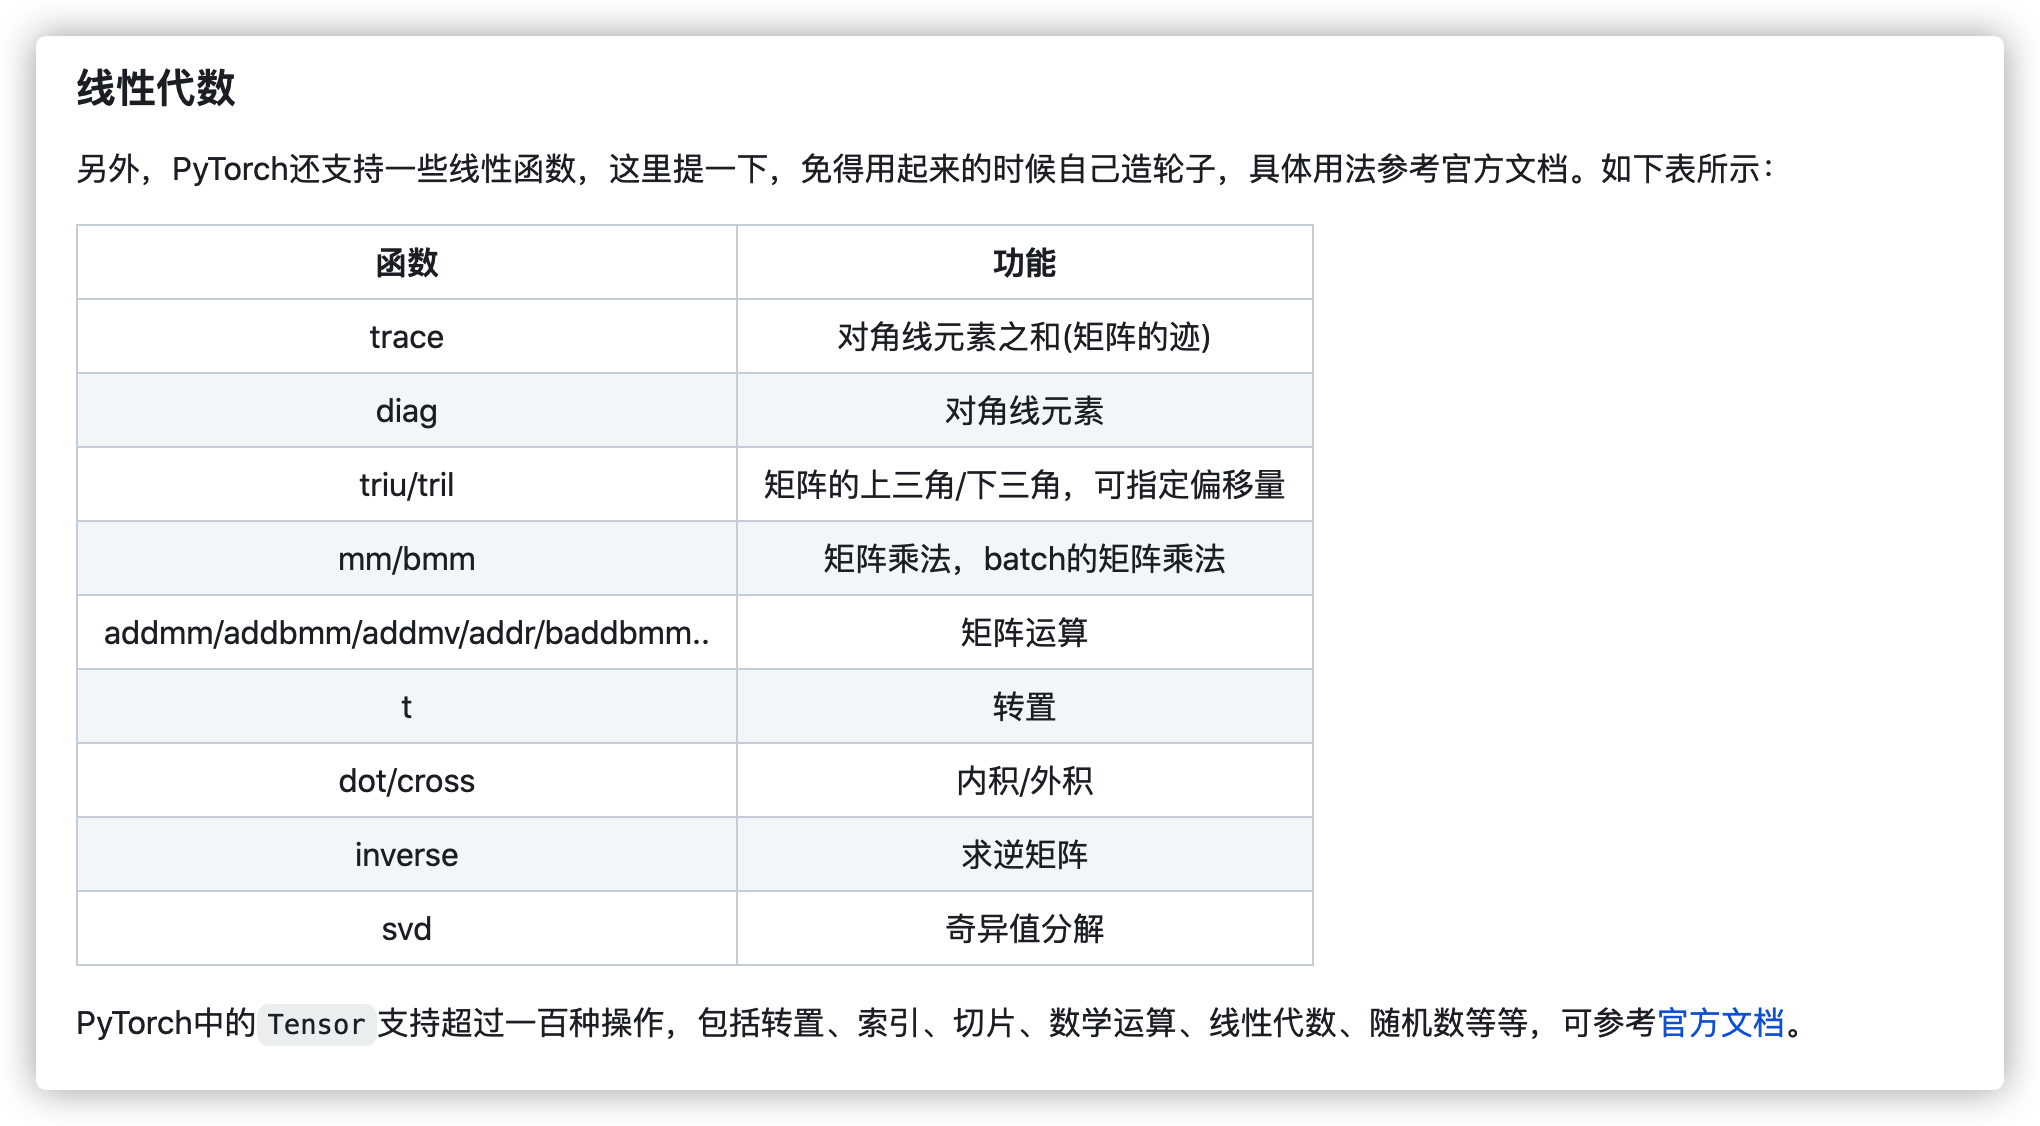

In [102]:
tmp=torch.rand(4,4)
print(tmp,tmp.trace())
print(tmp.diag())
print(tmp.tril(0))
print(tmp.triu(0))
print(tmp.t().mm(tmp))
# torch 里面的dot只支持1D
import numpy as np
def dot(a,b):
    if a.requires_grad:
        an=a.detach().numpy()
    else:
        an=a.numpy()
    if b.requires_grad:
        bn=b.detach().numpy()
    else:
        bn=b.numpy()
    return torch.from_numpy(np.dot(an,bn))
dot(tmp.t(),tmp)

tensor([[0.2330, 0.0277, 0.7649, 0.2629],
        [0.1082, 0.9688, 0.1635, 0.4984],
        [0.1966, 0.4888, 0.2910, 0.3480],
        [0.3690, 0.2991, 0.7502, 0.7049]]) tensor(2.1977)
tensor([0.2330, 0.9688, 0.2910, 0.7049])
tensor([[0.2330, 0.0000, 0.0000, 0.0000],
        [0.1082, 0.9688, 0.0000, 0.0000],
        [0.1966, 0.4888, 0.2910, 0.0000],
        [0.3690, 0.2991, 0.7502, 0.7049]])
tensor([[0.2330, 0.0277, 0.7649, 0.2629],
        [0.0000, 0.9688, 0.1635, 0.4984],
        [0.0000, 0.0000, 0.2910, 0.3480],
        [0.0000, 0.0000, 0.0000, 0.7049]])
tensor([[0.2408, 0.3178, 0.5299, 0.4437],
        [0.3178, 1.2678, 0.5462, 0.8711],
        [0.5299, 0.5462, 1.2594, 0.9127],
        [0.4437, 0.8711, 0.9127, 0.9355]])


tensor([[0.2408, 0.3178, 0.5299, 0.4437],
        [0.3178, 1.2678, 0.5462, 0.8711],
        [0.5299, 0.5462, 1.2594, 0.9127],
        [0.4437, 0.8711, 0.9127, 0.9355]])

In [44]:
x = torch.arange(1, 10).view(1, 9)
print(x)
y = torch.arange(1, 7).view(6, 1)
print(y)
print(x + y)

tensor([[1, 2, 3, 4, 5, 6, 7, 8, 9]])
tensor([[1],
        [2],
        [3],
        [4],
        [5],
        [6]])
tensor([[ 2,  3,  4,  5,  6,  7,  8,  9, 10],
        [ 3,  4,  5,  6,  7,  8,  9, 10, 11],
        [ 4,  5,  6,  7,  8,  9, 10, 11, 12],
        [ 5,  6,  7,  8,  9, 10, 11, 12, 13],
        [ 6,  7,  8,  9, 10, 11, 12, 13, 14],
        [ 7,  8,  9, 10, 11, 12, 13, 14, 15]])


In [45]:
x = torch.tensor([1, 2])
y = torch.tensor([3, 4])
id_before = id(y)
y = y + x
print(id(y) == id_before) # False 
x = torch.tensor([1, 2])
y = torch.tensor([3, 4])
id_before = id(y)
y[:] = y + x
print(id(y) == id_before) # False 

False
True


In [46]:
x = torch.ones(2, 2, requires_grad=True)
print(x)
print(x.grad_fn)

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)
None


In [47]:
y = x + 2
print(y)
print(y.grad_fn)

tensor([[3., 3.],
        [3., 3.]], grad_fn=<AddBackward0>)


In [48]:
print(x.is_leaf, y.is_leaf)

True False


In [49]:
z = y * y * 3
out = z.mean()
print(z, out)

tensor([[27., 27.],
        [27., 27.]], grad_fn=<MulBackward0>) tensor(27., grad_fn=<MeanBackward0>)


In [13]:
a = torch.randn(2, 2) # 缺失情况下默认 requires_grad = False
a = ((a * 3) / (a - 1))
print(a.requires_grad) # False
a.requires_grad_(True)
print(a.requires_grad) # True
b = (a * a).sum()
print(b.grad_fn)

False
True


In [14]:
out.backward() # 等价于 out.backward(torch.tensor(1.))

NameError: name 'out' is not defined

$$ o=\frac14\sum_{i=1}^4z_i=\frac14\sum_{i=1}^43(x_i+2)^2 $$ 所以 $$ \frac{\partial{o}}{\partial{x_i}}\bigr\rvert_{x_i=1}=\frac{9}{2}=4.5 $$

In [52]:
print(x.grad)

tensor([[4.5000, 4.5000],
        [4.5000, 4.5000]])


In [53]:
# 再来反向传播一次，注意grad是累加的
out2 = x.sum()
out2.backward()
print(x.grad)

out3 = x.sum()
x.grad.data.zero_()
out3.backward()
print(x.grad)

tensor([[5.5000, 5.5000],
        [5.5000, 5.5000]])
tensor([[1., 1.],
        [1., 1.]])


现在我们解释2.3.1节留下的问题，为什么在y.backward()时，如果y是标量，则不需要为backward()传入任何参数；否则，需要传入一个与y同形的Tensor? 简单来说就是为了避免向量（甚至更高维张量）对张量求导，而转换成标量对张量求导。举个例子，假设形状为 m x n 的矩阵 X 经过运算得到了 p x q 的矩阵 Y，Y 又经过运算得到了 s x t 的矩阵 Z。那么按照前面讲的规则，dZ/dY 应该是一个 s x t x p x q 四维张量，dY/dX 是一个 p x q x m x n的四维张量。问题来了，怎样反向传播？怎样将两个四维张量相乘？？？这要怎么乘？？？就算能解决两个四维张量怎么乘的问题，四维和三维的张量又怎么乘？导数的导数又怎么求，这一连串的问题，感觉要疯掉…… 为了避免这个问题，我们不允许张量对张量求导，只允许标量对张量求导，求导结果是和自变量同形的张量。所以必要时我们要把张量通过将所有张量的元素加权求和的方式转换为标量，举个例子，假设y由自变量x计算而来，w是和y同形的张量，则y.backward(w)的含义是：先计算l = torch.sum(y * w)，则l是个标量，然后求l对自变量x的导数。

In [54]:
x = torch.tensor([1.0, 2.0, 3.0, 4.0], requires_grad=True)
y = 2 * x
z = y.view(2, 2)
print(z)

tensor([[2., 4.],
        [6., 8.]], grad_fn=<ViewBackward0>)


In [55]:
v = torch.tensor([[1.0, 0.1], [0.01, 0.001]], dtype=torch.float)
z.backward(v)
print(x.grad)

tensor([2.0000, 0.2000, 0.0200, 0.0020])


In [56]:
x = torch.tensor(1.0, requires_grad=True)
y1 = x ** 2 
with torch.no_grad():#with torch.no_grad的作用 在该模块下，所有计算得出的tensor的requires_grad都自动设置为False。
    y2 = x ** 3
y3 = y1 + y2
    
print(x.requires_grad)
print(y1, y1.requires_grad) # True
print(y2, y2.requires_grad) # False
print(y3, y3.requires_grad) # True

True
tensor(1., grad_fn=<PowBackward0>) True
tensor(1.) False
tensor(2., grad_fn=<AddBackward0>) True


In [57]:
y3.backward()
print(x.grad)

tensor(2.)


In [58]:
x = torch.ones(1,requires_grad=True)

print(x.data) # 还是一个tensor
print(x.data.requires_grad) # 但是已经是独立于计算图之外

y = 2 * x
x.data *= 100 # 只改变了值，不会记录在计算图，所以不会影响梯度传播

y.backward()
print(x) # 更改data的值也会影响tensor的值
print(x.grad)

tensor([1.])
False
tensor([100.], requires_grad=True)
tensor([2.])


## Chapter3.1 linear_regression

In [61]:
import torch
from time import time

a = torch.ones(1000)
b = torch.ones(1000)
start = time()
c = torch.zeros(1000)
for i in range(1000):
    c[i] = a[i] + b[i]
print(time() - start)
start=time()
d=a+b
print(time()-start)

0.009404897689819336
6.389617919921875e-05


让我们再次回到本节的房价预测问题。如果我们对训练数据集里的3个房屋样本（索引分别为1、2和3）逐一预测价格，将得到 $$ \begin{aligned} \hat{y}^{(1)} &= x_1^{(1)} w_1 + x_2^{(1)} w_2 + b,\ \hat{y}^{(2)} &= x_1^{(2)} w_1 + x_2^{(2)} w_2 + b,\ \hat{y}^{(3)} &= x_1^{(3)} w_1 + x_2^{(3)} w_2 + b. \end{aligned} $$

$\boldsymbol{\hat{y}} = \boldsymbol{X} \boldsymbol{w} + b$ 
其中模型输出
$\boldsymbol{X}$ $\in \mathbb{R}^{n \times d}$ 权重， 偏差$\boldsymbol{y} \in\mathbb {R}^{n \times 1}$。
设模型参数$\boldsymbol{\theta} = [w_1, w_2, b]^\top$ ，我们可以重写损失函数为
$$ \ell(\boldsymbol{\theta})=\frac{1}{2n}(\boldsymbol{\hat{y}}-\boldsymbol{y})^\top(\boldsymbol{\hat{y}}-\boldsymbol{y}) $$
小批量随机梯度下降的迭代步骤将相应地改写为 $$ \boldsymbol{\theta} \leftarrow \boldsymbol{\theta} - \frac{\eta}{|\mathcal{B}|} \sum_{i \in \mathcal{B}} \nabla_{\boldsymbol{\theta}} \ell^{(i)}(\boldsymbol{\theta}), $$

其中梯度是损失有关3个为标量的模型参数的偏导数组成的向量： $$ \nabla_{\boldsymbol{\theta}} \ell^{(i)}(\boldsymbol{\theta})= \begin{bmatrix} \frac{ \partial \ell^{(i)}(w_1, w_2, b) }{\partial w_1} \ \frac{ \partial \ell^{(i)}(w_1, w_2, b) }{\partial w_2} \ \frac{ \partial \ell^{(i)}(w_1, w_2, b) }{\partial b} \end{bmatrix} = \begin{bmatrix} x_1^{(i)} (x_1^{(i)} w_1 + x_2^{(i)} w_2 + b - y^{(i)}) \ x_2^{(i)} (x_1^{(i)} w_1 + x_2^{(i)} w_2 + b - y^{(i)}) \ x_1^{(i)} w_1 + x_2^{(i)} w_2 + b - y^{(i)} \end{bmatrix}= \begin{bmatrix} x_1^{(i)} \ x_2^{(i)} \ 1 \end{bmatrix} (\hat{y}^{(i)} - y^{(i)}) $$


In [34]:
%matplotlib inline
import torch
from IPython import display
from matplotlib import pyplot as plt
import numpy as np
import random

我们构造一个简单的人工训练数据集，它可以使我们能够直观比较学到的参数和真实的模型参数的区别。设训练数据集样本数为1000，输入个数（特征数）为2。给定随机生成的批量样本特征$$ \boldsymbol{w} = [2, -3.4]^\top和偏差，以及一个随机噪声项  来生成标签 \boldsymbol{y} = \boldsymbol{X}\boldsymbol{w} + b + \epsilon $$

其中噪声项  服从均值为0、标准差为0.01的正态分布。噪声代表了数据集中无意义的干扰。下面，让我们生成数据集。

在训练模型的时候，我们需要遍历数据集并不断读取小批量数据样本。这里我们定义一个函数：它每次返回batch_size（批量大小）个随机样本的特征和标签。

In [34]:
# 本函数已保存在d2lzh包中方便以后使用
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    random.shuffle(indices)  # 样本的读取顺序是随机的
    for i in range(0, num_examples, batch_size):
        j = torch.LongTensor(indices[i: min(i + batch_size, num_examples)]) # 最后一次可能不足一个batch
        yield  features.index_select(0, j), labels.index_select(0, j)
    #index_select()的第一个参数代表切割的维度，第二个参数是索引，确定切割的范围

yield 函数的基本使用案例
```python
def my_func():
    for i in range(3):
        yeild i
print(my_func())
print(my_func().next())
print(my_func().next())
```

In [35]:
batch_size = 10
n=2
for X, y in data_iter(batch_size, features, labels):
    print(X, y)
    n-=1
    if (n==0):
        break


tensor([[-0.2146,  1.1717],
        [-0.4710, -0.0792],
        [ 1.7408, -0.2207],
        [ 0.1353, -2.2017],
        [-1.3704, -0.0188],
        [ 1.3425,  0.9400],
        [-1.7712, -0.2305],
        [-0.3814, -0.2064],
        [ 1.6525,  0.3734],
        [ 2.2685, -2.2229]]) tensor([-0.2053,  3.5395,  8.4314, 11.9583,  1.5254,  3.6923,  1.4343,  4.1438,
         6.2318, 16.2960])
tensor([[ 0.5289,  0.4784],
        [-0.9513, -2.1123],
        [ 0.9235, -1.3880],
        [-0.4115, -0.1344],
        [ 1.1877, -0.4906],
        [ 0.4611,  1.6658],
        [ 1.4583, -0.2330],
        [ 0.2064, -0.3526],
        [-1.0722, -0.2521],
        [-0.3766,  0.5525]]) tensor([ 3.6250,  9.4671, 10.7612,  3.8505,  8.2439, -0.5363,  7.9054,  5.8314,
         2.9098,  1.5686])


In [82]:
w = torch.tensor(np.random.normal(loc=0, scale=0.01, size=(num_inputs, 1)), dtype=torch.float32)
b = torch.zeros(1, dtype=torch.float32)
print(w,b)

tensor([[-0.0124],
        [ 0.0102]]) tensor([0.])


In [83]:
w.requires_grad_(requires_grad=True)
b.requires_grad_(requires_grad=True) 

tensor([0.], requires_grad=True)

In [103]:
def linreg(X, w, b):  # 本函数已保存在d2lzh_pytorch包中方便以后使用
    return torch.mm(X, w) + b
def linreg_dot(X,w,b):
    return dot(X,w)+b

定义损失函数
我们使用上一节描述的平方损失来定义线性回归的损失函数。在实现中，我们需要把真实值y变形成预测值y_hat的形状。以下函数返回的结果也将和y_hat的形状相同。

In [67]:
def squared_loss(y_hat, y):  # 本函数已保存在d2lzh_pytorch包中方便以后使用
    # 注意这里返回的是向量, 另外, pytorch里的MSELoss并没有除以 2
    return (y_hat - y.view(y_hat.size())) ** 2 / 2
def sgd(params, lr, batch_size):  # 本函数已保存在d2lzh_pytorch包中方便以后使用
    for param in params:
        param.data -= lr * param.grad / batch_size # 注意这里更改param时用的param.data


In [30]:
num_inputs = 2
num_examples = 1000
true_w = [2, -3.4]
true_b = 4.2
features = torch.randn(num_examples, num_inputs,
                       dtype=torch.float32)
labels = true_w[0] * features[:, 0] + true_w[1] * features[:, 1] + true_b
labels += torch.tensor(np.random.normal(0, 0.01, size=labels.size()),
                       dtype=torch.float32)
print(features[0], labels[0])
print(labels.shape)
print(features)

tensor([-1.4308,  0.5004]) tensor(-0.3637)
torch.Size([1000])
tensor([[-1.4308,  0.5004],
        [-0.3036,  0.6743],
        [-1.5125, -0.1321],
        ...,
        [ 0.6961, -0.9043],
        [-1.1403,  0.1449],
        [-0.1110,  0.1387]])


/Users/lucifer/opt/anaconda3/envs/pytorch_py37/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  This is separate from the ipykernel package so we can avoid doing imports until


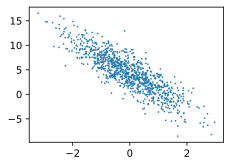

In [138]:
def use_svg_display():
    # 用矢量图显示
    display.set_matplotlib_formats('svg')

def set_figsize(figsize=(3.5, 2.5)):
    use_svg_display()
    # 设置图的尺寸
    plt.rcParams['figure.figsize'] = figsize

# # 在../d2lzh_pytorch里面添加上面两个函数后就可以这样导入
# import sys
# sys.path.append("..")
# from d2lzh_pytorch import * 

set_figsize()
plt.scatter(features[:, 1].numpy(), labels.numpy(), 0.5);

In [149]:
lr = 0.03
num_epochs = 3
net = linreg
loss = squared_loss

for epoch in range(num_epochs):  # 训练模型一共需要num_epochs个迭代周期
    # 在每一个迭代周期中，会使用训练数据集中所有样本一次（假设样本数能够被批量大小整除）。X
    # 和y分别是小批量样本的特征和标签
    for X, y in data_iter(batch_size, features, labels):
        l = loss(net(X, w, b), y).sum()  # l是有关小批量X和y的损失
        l.backward()  # 小批量的损失对模型参数求梯度
        sgd([w, b], lr, batch_size)  # 使用小批量随机梯度下降迭代模型参数
        
        # 不要忘了梯度清零
        w.grad.data.zero_()
        b.grad.data.zero_()
    train_l = loss(net(features, w, b), labels)
    print('epoch %d, loss %f' % (epoch + 1, train_l.mean().item()))

epoch 1, loss 0.000051
epoch 2, loss 0.000051
epoch 3, loss 0.000051


In [154]:
class linear_regression:
    def __init__(self,features,labels,lr=0.01,num_epoches=10,batch_size=10):
        self.lr=lr
        self.num_epoches=num_epoches
        self.features=features
        self.labels=labels
        self.batch_size=batch_size
        self.w = torch.tensor(np.random.normal(loc=0, scale=0.01, size=(num_inputs, 1)), dtype=torch.float32)
        self.b = torch.zeros(1, dtype=torch.float32)
        self.w.requires_grad_(requires_grad=True)
        self.b.requires_grad_(requires_grad=True) 
    def data_iter(self,features,labels):
        num_examples = len(features)
        indices = list(range(num_examples))
        random.shuffle(indices)  # 样本的读取顺序是随机的
        for i in range(0, num_examples, self.batch_size):
            j = torch.LongTensor(indices[i: min(i + self.batch_size, num_examples)]) # 最后一次可能不足一个batch
            yield  features.index_select(0, j), labels.index_select(0, j)
    def linreg(self,X, w, b):
        return torch.mm(X, w) + b
    def squared_loss(self,y_hat, y):  
        return (y_hat - y.view(y_hat.size())) ** 2 / 2
    def sgd(self,params, lr, batch_size):
        for param in params:
            param.data -= lr * param.grad / batch_size # 注意这里更改param时用的param.data
    def fit(self):
        for i in range(self.num_epoches):
            for X,y in self.data_iter(self.features,self.labels):
                l=self.squared_loss(self.linreg(X,self.w,self.b),y).sum()
                l.backward()
                self.sgd([self.w,self.b],self.lr,self.batch_size)
                self.w.grad.data.zero_()
                self.b.grad.data.zero_()
            train_loss=self.squared_loss(self.linreg(self.features,self.w,self.b),self.labels)
            print('epoch %d, loss %f' % (i + 1, train_loss.mean().item()))
lr=linear_regression(features,labels)
lr.fit()
    

epoch 1, loss 2.126641
epoch 2, loss 0.263913
epoch 3, loss 0.032996
epoch 4, loss 0.004185
epoch 5, loss 0.000578
epoch 6, loss 0.000118
epoch 7, loss 0.000059
epoch 8, loss 0.000052
epoch 9, loss 0.000051
epoch 10, loss 0.000051


In [152]:
print(true_w,'\n',w)
print(true_b,'\n',b)

[2, -3.4] 
 tensor([[ 2.0005],
        [-3.4002]], requires_grad=True)
4.2 
 tensor([4.1999], requires_grad=True)


In [156]:
import torch.utils.data as Data

batch_size = 10
# 将训练数据的特征和标签组合
dataset = Data.TensorDataset(features, labels)
# 随机读取小批量
data_iter = Data.DataLoader(dataset, batch_size, shuffle=True)
for X, y in data_iter:
    print(X, y)
    break

tensor([[-0.1692, -2.2571],
        [-1.5055, -1.8355],
        [-0.7122,  0.7145],
        [ 0.0987,  0.7814],
        [-1.0782,  0.9680],
        [ 0.6896,  0.3083],
        [-0.4661,  1.4214],
        [-0.3331,  0.5386],
        [ 0.9579, -1.7862],
        [-0.6249, -0.1238]]) tensor([11.5262,  7.4453,  0.3453,  1.7387, -1.2493,  4.5428, -1.5739,  1.6980,
        12.1811,  3.3812])


In [171]:
import torch.nn as nn 
class LinearNet(nn.Module):
    def __init__(self, n_feature):
        super(LinearNet, self).__init__()
        self.linear = nn.Linear(n_feature, 1)
    # forward 定义前向传播
    def forward(self, x):
        y = self.linear(x)
        return y
    
net = LinearNet(num_inputs)
print(net) # 使用print可以打印出网络的结构

LinearNet(
  (linear): Linear(in_features=2, out_features=1, bias=True)
)


In [11]:
# 写法一
net = nn.Sequential(
    nn.Linear(num_inputs, 1)
    # 此处还可以传入其他层
    )

# 写法二
net = nn.Sequential()
net.add_module('linear', nn.Linear(num_inputs, 1))
# net.add_module ......

# 写法三
from collections import OrderedDict
net = nn.Sequential(OrderedDict([
          ('linear', nn.Linear(num_inputs, 1))
          # ......
        ]))

print(net)
print(net[0])
from torch.nn import init

init.normal_(net[0].weight, mean=0, std=0.01)#net[0].weight 对应net.parameters中与w相关的参数,用于自己定义初始化
init.constant_(net[0].bias, val=0) #net[0].bias 对应net.parameters中与b相关的参数,用于自己定义初始化

Sequential(
  (linear): Linear(in_features=784, out_features=2, bias=True)
)
Linear(in_features=784, out_features=2, bias=True)


Parameter containing:
tensor([0., 0.], requires_grad=True)

In [191]:
for param in net.parameters():#generator weight 应该是随机生成的
    print(param)

Parameter containing:
tensor([[-0.0161, -0.0119]], requires_grad=True)
Parameter containing:
tensor([0.], requires_grad=True)


在使用net前，我们需要初始化模型参数，如线性回归模型中的权重和偏差。PyTorch在init模块中提供了多种参数初始化方法。这里的init是initializer的缩写形式。我们通过init.normal_将权重参数每个元素初始化为随机采样于均值为0、标准差为0.01的正态分布。偏差会初始化为零。

In [192]:
loss = nn.MSELoss()
import torch.optim as optim

optimizer = optim.SGD(net.parameters(), lr=0.01)
print(optimizer)
num_epochs = 3
for epoch in range(1, num_epochs + 1):
    for X, y in data_iter:
        output = net(X)
        l = loss(output, y.view(-1, 1))
        optimizer.zero_grad() # 梯度清零，等价于net.zero_grad()
        l.backward()
        optimizer.step()
    print('epoch %d, loss: %f' % (epoch, l.item()))

SGD (
Parameter Group 0
    dampening: 0
    foreach: None
    lr: 0.01
    maximize: False
    momentum: 0
    nesterov: False
    weight_decay: 0
)
epoch 1, loss: 0.527600
epoch 2, loss: 0.008230
epoch 3, loss: 0.000132


In [183]:
import torch
import torch.nn as nn
from torch import optim
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.features = nn.Sequential(
                    nn.Conv2d(3, 6, 5),
                    nn.ReLU(),
                    nn.MaxPool2d(2,2),
                    nn.Conv2d(6, 16, 5),
                    nn.ReLU(),
                    nn.MaxPool2d(2,2)
        )
        self.classifier = nn.Sequential(
            nn.Linear(16 * 5 * 5, 120),
            nn.ReLU(),
            nn.Linear(120, 84),
            nn.ReLU(),
            nn.Linear(84, 10)
        )
    def forward(self, x):
        x = self.features(x)
        x = x.view(-1, 16 * 5 * 5)
        x = self.classifier(x)
        return x
net = Net()
optimizer =optim.SGD([
                # 如果对某个参数不指定学习率，就使用最外层的默认学习率
                {'params': net.features.parameters()}, # lr=0.03
                {'params': net.classifier.parameters(), 'lr': 0.01}
            ], lr=0.03)
print(optimizer)

SGD (
Parameter Group 0
    dampening: 0
    foreach: None
    lr: 0.03
    maximize: False
    momentum: 0
    nesterov: False
    weight_decay: 0

Parameter Group 1
    dampening: 0
    foreach: None
    lr: 0.01
    maximize: False
    momentum: 0
    nesterov: False
    weight_decay: 0
)


## Chapter3.2 softmax_regression

In [1]:
import torch
import torchvision
import numpy as np
import sys
sys.path.append("..") # 为了导入上层目录的d2lzh_pytorch
import hcy_test as test

In [69]:
batch_size = 256
train_iter, test_iter = test.load_data_fashion_mnist(batch_size)

In [46]:
num_inputs = 784
num_outputs = 10

W = torch.tensor(np.random.normal(0, 0.01, (num_inputs, num_outputs)), dtype=torch.float)
b = torch.zeros(num_outputs, dtype=torch.float)
W.requires_grad_(requires_grad=True)
b.requires_grad_(requires_grad=True) 

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], requires_grad=True)

In [5]:
X = torch.tensor([[1, 2, 3], [4, 5, 6]])
print(X.sum(dim=0, keepdim=True))
print(X.sum(dim=1, keepdim=True))

tensor([[5, 7, 9]])
tensor([[ 6],
        [15]])


In [18]:
def softmax(X):
    X_exp = X.exp()
    partition = X_exp.sum(dim=1, keepdim=True)
    return X_exp / partition  # 这里应用了广播机制()

In [19]:
X=torch.rand(2,5)
X_pro=softmax(X)
print(X_pro,X_pro.sum(dim=1))

tensor([[0.2205, 0.1210, 0.1459, 0.2787, 0.2339],
        [0.1804, 0.1412, 0.2712, 0.2382, 0.1690]]) tensor([1., 1.])


In [36]:
y_hat = torch.tensor([[0.1, 0.3, 0.6], [0.3, 0.2, 0.5]])
y = torch.LongTensor([0, 2])
print(y.view(-1, 1))
y_hat.gather(1, y.view(-1, 1))

tensor([[0],
        [2]])


tensor([[0.1000],
        [0.5000]])

In [47]:
def net(X):
    return softmax(torch.mm(X.view(-1,num_inputs),W)+b)

In [90]:
def softmax(X):
    X_exp = X.exp()
    partition = X_exp.sum(dim=1, keepdim=True)
    return X_exp / partition  # 这里应用了广播机制()
def cross_entropy(y_hat, y):
    return - torch.log(y_hat.gather(1, y.view(-1, 1)))
def accuracy(y_hat,y):
    return (y_hat.argmax(dim=1)==y).float().mean().item()
def evaluate_accuracy(data_iter, net):
    acc_sum, n = 0.0, 0
    for X, y in data_iter:
        acc_sum += (net(X).argmax(dim=1) == y).float().sum().item()
        n += y.shape[0]
    return acc_sum / n

In [111]:
class softmax_regression:
    def __init__(self,num_inputs,num_outputs,features=None,labels=None,test_features=None,test_labels=None,lr=0.01,num_epoches=10,batch_size=10,optimizer=None,itered=True,train_iter=None,test_iter=None):
        self.lr=lr
        self.num_epoches=num_epoches
        self.num_inputs=num_inputs
        self.num_outputs=num_outputs
        self.features=features
        self.labels=labels
        self.testfeatures=test_features
        self.testlabels=test_labels
        self.batch_size=batch_size
        self.w = torch.tensor(np.random.normal(loc=0, scale=0.01, size=(num_inputs, num_outputs)), dtype=torch.float32)
        self.b = torch.zeros(num_outputs, dtype=torch.float32)
        self.w.requires_grad_(requires_grad=True)
        self.b.requires_grad_(requires_grad=True)
        self.optimizer=optimizer
        self.itered=itered
        self.train_iter=train_iter
        self.test_iter=test_iter
    def data_iter(self,features,labels):
        num_examples = len(features)
        indices = list(range(num_examples))
        random.shuffle(indices)  # 样本的读取顺序是随机的
        for i in range(0, num_examples, self.batch_size):
            j = torch.LongTensor(indices[i: min(i + self.batch_size, num_examples)]) # 最后一次可能不足一个batch
            yield  features.index_select(0, j), labels.index_select(0, j)
    def softmax(self,X):
        X_exp=X.exp()
        partition=X_exp.sum(dim=1,keepdim=True)
        return X_exp/partition
    def net(self,X, W, b):
        return self.softmax(torch.mm(X.view(-1,self.num_inputs),W)+b)
    def cross_entropy(self,y_hat, y):
        return - torch.log(y_hat.gather(1, y.view(-1, 1)))
    def accuracy(self,y_hat,y):
        return (y_hat.argmax(dim=1)==y).float().mean().item()
    def evaluate_accuracy(self,data_iter,net):
        acc_sum,n=0.0,0
        for X,y in data_iter:
            acc_sum+=(self.net(X,self.w,self.b).argmax(dim=1)==y).float().sum().item()
            n+=y.shape[0]
        return acc_sum/n
    def sgd(self,params, lr, batch_size):
        for param in params:
            param.data -= lr * param.grad / batch_size # 注意这里更改param时用的param.data
    def fit(self):
        train_l_sum, train_acc_sum, n = 0.0, 0.0, 0
        for epoch in range(self.num_epoches):
            if self.itered==True:
                for X,y in self.train_iter:
                    l=self.cross_entropy(self.net(X,self.w,self.b),y).sum()
                    if self.optimizer is not None:
                        self.optimizer.zero_grad()
                    l.backward()
                    if self.optimizer is None:
                        self.sgd([self.w,self.b],self.lr,self.batch_size)
                        self.w.grad.data.zero_()
                        self.b.grad.data.zero_()
                    else:
                        self.optimizer.step() 
                    train_l_sum += l.item()
                    train_acc_sum += (self.net(X,self.w,self.b).argmax(dim=1) == y).sum().item()
                    n += y.shape[0]
                test_acc = self.evaluate_accuracy(self.test_iter, self.net)
                print('epoch %d, loss %.4f, train acc %.3f, test acc %.3f'%
                      (epoch + 1, train_l_sum / n, train_acc_sum / n, test_acc))
            else:
                for X,y in self.data_iter(self.features,self.labels):
                    l=self.cross_entropy(self.net(X,self.w,self.b),y).sum()
                    if self.optimizer is not None:
                        self.optimizer.zero_grad()
                    l.backward()
                    if self.optimizer is None:
                        self.sgd([self.w,self.b],self.lr,self.batch_size)
                        self.w.grad.data.zero_()
                        self.b.grad.data.zero_()
                    else:
                        self.optimizer.step() 
                    train_l_sum += l.item()
                    train_acc_sum += (self.net(X,self.w,self.b).argmax(dim=1) == y).sum().item()
                    n += y.shape[0]
                test_acc = self.evaluate_accuracy(self.data_iter(self.testfeatures,self.testlabels),self.net)
                print('epoch %d, loss %.4f, train acc %.3f, test acc %.3f'%
                      (epoch + 1, train_l_sum / n, train_acc_sum / n, test_acc))

In [1]:
import sys
sys.path.append("..")
import hcy_test as test
num_inputs=28*28
num_outputs=10
train_iter,test_iter=test.load_data_fashion_mnist(256)
sr=test.softmax_regression(num_inputs,num_outputs,train_iter=train_iter,test_iter=test_iter)
sr.fit()

epoch 1, loss 0.8884, train acc 0.752, test acc 0.777
epoch 2, loss 0.7533, train acc 0.782, test acc 0.814
epoch 3, loss 0.6872, train acc 0.797, test acc 0.824
epoch 4, loss 0.6482, train acc 0.807, test acc 0.834
epoch 5, loss 0.6242, train acc 0.813, test acc 0.835
epoch 6, loss 0.6063, train acc 0.818, test acc 0.836
epoch 7, loss 0.5907, train acc 0.821, test acc 0.835
epoch 8, loss 0.5788, train acc 0.824, test acc 0.837
epoch 9, loss 0.5683, train acc 0.827, test acc 0.792
epoch 10, loss 0.5609, train acc 0.829, test acc 0.835


In [107]:
import torch
import torchvision
import torchvision.transforms as transforms
mnist_train = torchvision.datasets.FashionMNIST(root='/Users/lucifer/Desktop/pytorch/Datasets/FashionMNIST', train=True, download=False, transform=transforms.ToTensor())
mnist_test = torchvision.datasets.FashionMNIST(root='/Users/lucifer/Desktop/pytorch/Datasets/FashionMNIST', train=False, download=False, transform=transforms.ToTensor())

In [113]:
features=[]
labels=[]
test_features=[]
test_labels=[]
for feature, label in mnist_train:
    features.append(feature)
    labels.append(label)
features=torch.stack(features)
labels=torch.tensor(labels)
for feature, label in mnist_train:
    test_features.append(feature)
    test_labels.append(label)
test_features=torch.stack(test_features)
test_labels=torch.tensor(test_labels)
sr=softmax_regression(
    num_inputs,num_outputs,
    features=features,labels=labels,test_features=test_features,test_labels=test_labels,
    batch_size=256,itered=False
)
sr.fit()

epoch 1, loss 1.3710, train acc 0.651, test acc 0.694
epoch 2, loss 1.1442, train acc 0.685, test acc 0.738
epoch 3, loss 1.0306, train acc 0.707, test acc 0.761
epoch 4, loss 0.9586, train acc 0.723, test acc 0.776
epoch 5, loss 0.9075, train acc 0.734, test acc 0.785
epoch 6, loss 0.8686, train acc 0.744, test acc 0.792
epoch 7, loss 0.8377, train acc 0.751, test acc 0.797
epoch 8, loss 0.8122, train acc 0.757, test acc 0.801
epoch 9, loss 0.7907, train acc 0.762, test acc 0.805
epoch 10, loss 0.7723, train acc 0.767, test acc 0.808


In [3]:
import torch.nn as nn
class FlattenLayer(nn.Module):
    def __init__(self):
        super(FlattenLayer, self).__init__() #等同于 super().__init__()
    def forward(self, x): # x shape: (batch, *, *, ...)
        return x.view(x.shape[0], -1)

In [21]:
from collections import OrderedDict
import sys
sys.path.append("..")
import hcy_test as test
num_inputs=28*28
num_outputs=10
train_iter,test_iter=test.load_data_fashion_mnist(256)
net=nn.Sequential(
    OrderedDict(
        [('flatten',test.FlattenLayer()),
        ('linear',nn.Linear(num_inputs,num_outputs))]
    )
)
batch_size=256
from torch.nn import init
import torch.optim
init.normal_(net.linear.weight, mean=0, std=0.01)
init.constant_(net.linear.bias, val=0) 
loss = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(net.parameters(), lr=0.01)
num_epochs=5
test.train_module(net,train_iter, test_iter, loss, num_epochs, batch_size, None, None, optimizer)

epoch 1, loss 0.0053, train acc 0.651, test acc 0.684
epoch 2, loss 0.0036, train acc 0.716, test acc 0.723
epoch 3, loss 0.0031, train acc 0.749, test acc 0.747
epoch 4, loss 0.0029, train acc 0.768, test acc 0.760
epoch 5, loss 0.0028, train acc 0.780, test acc 0.771


## 3.3 MLP(多层感知机（multilayer perceptron，MLP)

多层感知机在单层神经网络的基础上引入了一到多个隐藏层（hidden layer）。隐藏层位于输入层和输出层之间,下图展示了一个多层感知机的神经网络图，它含有一个隐藏层，该层中有5个隐藏单元。
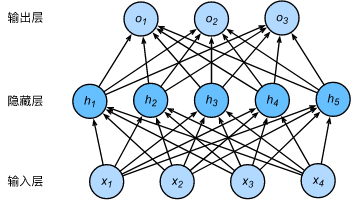
在上图所示的多层感知机中，输入和输出个数分别为4和3，中间的隐藏层中包含了5个隐藏单元（hidden unit）。由于输入层不涉及计算，图3.3中的多层感知机的层数为2。由上图可见，隐藏层中的神经元和输入层中各个输入完全连接，输出层中的神经元和隐藏层中的各个神经元也完全连接。因此，多层感知机中的隐藏层和输出层都是全连接层。
具体来说，给定一个小批量样本，其批量大小n,有$\boldsymbol{H}。因为隐藏层和输出层均是全连接层，可以设隐藏层的权重参数和偏差参数分别\boldsymbol{W}_h \in \mathbb{R}^{d \times h}和 \boldsymbol{W}_o \in \mathbb{R}^{h \times q}$
我们先来看一种含单隐藏层的多层感知机的设计。其输出$\boldsymbol{O} \in \mathbb{R}^{n \times q}$的计算为:
$$ \boldsymbol{H}=\boldsymbol{X}\boldsymbol{W}_h+b_h \\  \boldsymbol{O}=\boldsymbol{H}\boldsymbol{W}_o+b_o
$$
也就是将隐藏层的输出直接作为输出层的输入。如果将以上两个式子联立起来，可以得到
$$\boldsymbol{O}=(\boldsymbol{X}\boldsymbol{W}_h+b_h)\boldsymbol{W}_o+b_o$$
从联立后的式子可以看出，虽然神经网络引入了隐藏层，却依然等价于一个单层神经网络：其中输出层权重参数$\boldsymbol{W}_h\boldsymbol{W}_o,\boldsymbol{b}_h \boldsymbol{W}_o + \boldsymbol{b}_o$。不难发现，即便再添加更多的隐藏层，以上设计依然只能与仅含输出层的单层神经网络等价。
上述问题的根源在于全连接层只是对数据做仿射变换（affine transformation），而多个仿射变换的叠加仍然是一个仿射变换。解决问题的一个方法是引入非线性变换，例如对隐藏变量使用按元素运算的非线性函数进行变换，然后再作为下一个全连接层的输入。这个非线性函数被称为激活函数（activation function）。下面我们介绍几个常用的激活函数:Relu,tanh,sigmoid
层感知机就是含有至少一个隐藏层的由全连接层组成的神经网络，且每个隐藏层的输出通过激活函数进行变换。多层感知机的层数和各隐藏层中隐藏单元个数都是超参数。以单隐藏层为例并沿用本节之前定义的符号，多层感知机按以下方式计算输出：
$$ \boldsymbol{H}=\phi(\boldsymbol{X}\boldsymbol{W}_h+b_h) \\  \boldsymbol{O}=\boldsymbol{H}\boldsymbol{W}_o+b_o
$$
其中$\phi$表示激活函数。在分类问题中，我们可以对输出$\boldsymbol{O}$做softmax运算，并使用softmax回归中的交叉熵损失函数。 在回归问题中，我们将输出层的输出个数设为1，并将输出$\boldsymbol{O}$直接提供给线性回归中使用的平方损失函数。

In [10]:
import numpy as np
batch_size = 256
train_iter, test_iter = test.load_data_fashion_mnist(batch_size)
num_inputs, num_outputs, num_hiddens = 784, 10, 256

W1 = torch.tensor(np.random.normal(0, 0.01, (num_inputs, num_hiddens)), dtype=torch.float)
b1 = torch.zeros(num_hiddens, dtype=torch.float)
W2 = torch.tensor(np.random.normal(0, 0.01, (num_hiddens, num_outputs)), dtype=torch.float)
b2 = torch.zeros(num_outputs, dtype=torch.float)

params = [W1, b1, W2, b2]
for param in params:
    param.requires_grad_(requires_grad=True)
def relu(X):
    return torch.max(input=X, other=torch.tensor(0.0))
def net(X):
    X = X.view((-1, num_inputs))
    H = relu(torch.matmul(X, W1) + b1)
    return torch.matmul(H, W2) + b2
loss = torch.nn.CrossEntropyLoss()
num_epochs, lr = 5, 100.0
test.train_module(net, train_iter, test_iter, loss, num_epochs, batch_size, params, lr)

epoch 1, loss 0.0031, train acc 0.706, test acc 0.773
epoch 2, loss 0.0019, train acc 0.824, test acc 0.736
epoch 3, loss 0.0017, train acc 0.843, test acc 0.799
epoch 4, loss 0.0015, train acc 0.856, test acc 0.791
epoch 5, loss 0.0015, train acc 0.864, test acc 0.771


In [19]:
from collections import OrderedDict
import sys
sys.path.append("..")
import torch.nn as nn 
import hcy_test as test
num_inputs=28*28
hidden=256
num_outputs=10
train_iter,test_iter=test.load_data_fashion_mnist(256)
net=nn.Sequential(
    
        test.FlattenLayer(),
        nn.Linear(num_inputs,hidden),
        nn.ReLU(),
        nn.Linear(hidden,num_outputs),
)
batch_size=256
from torch.nn import init
import torch.optim
num_epochs= 5
for params in net.parameters():
    init.normal_(params, mean=0, std=0.01)
optimizer=torch.optim.SGD(net.parameters(),lr=0.1)
loss = torch.nn.CrossEntropyLoss()
import hcy_test as test
train_iter,test_iter=test.load_data_fashion_mnist(batch_size)
test.train_module(net,train_iter,test_iter,loss,num_epochs,batch_size,None,None,optimizer)


epoch 1, loss 0.0041, train acc 0.637, test acc 0.731
epoch 2, loss 0.0023, train acc 0.791, test acc 0.756
epoch 3, loss 0.0020, train acc 0.818, test acc 0.820
epoch 4, loss 0.0019, train acc 0.830, test acc 0.809
epoch 5, loss 0.0018, train acc 0.840, test acc 0.825


In [17]:
num_inputs, num_outputs, num_hiddens = 784, 10, 256
    
net = nn.Sequential(
        test.FlattenLayer(),
        nn.Linear(num_inputs, num_hiddens),
        nn.ReLU(),
        nn.Linear(num_hiddens, num_outputs), 
        )

for params in net.parameters():
    init.normal_(params, mean=0, std=0.01)
batch_size = 256
train_iter, test_iter = test.load_data_fashion_mnist(batch_size)
loss = torch.nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(net.parameters(), lr=0.5)

num_epochs = 5
test.train_module(net, train_iter, test_iter, loss, num_epochs, batch_size, None, None, optimizer)

epoch 1, loss 0.0032, train acc 0.699, test acc 0.727
epoch 2, loss 0.0019, train acc 0.818, test acc 0.809
epoch 3, loss 0.0017, train acc 0.842, test acc 0.783
epoch 4, loss 0.0015, train acc 0.854, test acc 0.839
epoch 5, loss 0.0015, train acc 0.863, test acc 0.847


## chapter 3.4 权重衰减

权重衰减等价于$L_2$范数正则化（regularization）。正则化通过为模型损失函数添加惩罚项使学出的模型参数值较小，是应对过拟合的常用手段。我们先描述$L_2$范数正则化，再解释它为何又称权重衰减。

$L_2$范数正则化在模型原损失函数基础上添加$L_2$范数正则化惩罚项，从而得到训练所需要最小化的函数。范数惩罚项指的是模型权重参数每个元素的平方和与一个正的常数的乘积。以3.1节（线性回归）中的线性回归损失函数


In [1]:
%matplotlib inline
import torch
import torch.nn as nn
import numpy as np
import sys
sys.path.append("..") 
import hcy_test as test

n_train, n_test, num_inputs = 20, 100, 200
true_w, true_b = torch.ones(num_inputs, 1) * 0.01, 0.05

features = torch.randn((n_train + n_test, num_inputs))
labels = torch.matmul(features, true_w) + true_b
labels += torch.tensor(np.random.normal(0, 0.01, size=labels.size()), dtype=torch.float)
train_features, test_features = features[:n_train, :], features[n_train:, :]
train_labels, test_labels = labels[:n_train], labels[n_train:]


In [2]:
def init_params():
    w = torch.randn((num_inputs, 1), requires_grad=True)
    b = torch.zeros(1, requires_grad=True)
    return [w, b]
def l2_penalty(w):
    return (w**2).sum() / 2

In [3]:
batch_size, num_epochs, lr = 1, 100, 0.003
net, loss = test.linreg, test.squared_loss

dataset = torch.utils.data.TensorDataset(train_features, train_labels)
train_iter = torch.utils.data.DataLoader(dataset, batch_size, shuffle=True)

def fit_and_plot(lambd):
    w, b = init_params()
    train_ls, test_ls = [], []
    for _ in range(num_epochs):
        for X, y in train_iter:
            # 添加了L2范数惩罚项
            l = loss(net(X, w, b), y) + lambd * l2_penalty(w)
            l = l.sum()
            
            if w.grad is not None:
                w.grad.data.zero_()
                b.grad.data.zero_()
            l.backward()
            test.sgd([w, b], lr, batch_size)
        train_ls.append(loss(net(train_features, w, b), train_labels).mean().item())
        test_ls.append(loss(net(test_features, w, b), test_labels).mean().item())
    test.semilogy(range(1, num_epochs + 1), train_ls, 'epochs', 'loss',
                 range(1, num_epochs + 1), test_ls, ['train', 'test'])
    print('L2 norm of w:', w.norm().item())

L2 norm of w: 0.043517280369997025


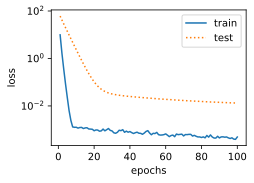

In [7]:
fit_and_plot(3)

In [8]:
def fit_and_plot_pytorch(wd):
    # 对权重参数衰减。权重名称一般是以weight结尾
    net = nn.Linear(num_inputs, 1)
    nn.init.normal_(net.weight, mean=0, std=1)
    nn.init.normal_(net.bias, mean=0, std=1)
    optimizer_w = torch.optim.SGD(params=[net.weight], lr=lr, weight_decay=wd) # 对权重参数衰减
    optimizer_b = torch.optim.SGD(params=[net.bias], lr=lr)  # 不对偏差参数衰减
    
    train_ls, test_ls = [], []
    for _ in range(num_epochs):
        for X, y in train_iter:
            l = loss(net(X), y).mean()
            optimizer_w.zero_grad()
            optimizer_b.zero_grad()
            
            l.backward()
            
            # 对两个optimizer实例分别调用step函数，从而分别更新权重和偏差
            optimizer_w.step()
            optimizer_b.step()
        train_ls.append(loss(net(train_features), train_labels).mean().item())
        test_ls.append(loss(net(test_features), test_labels).mean().item())
    test.semilogy(range(1, num_epochs + 1), train_ls, 'epochs', 'loss',
                 range(1, num_epochs + 1), test_ls, ['train', 'test'])
    print('L2 norm of w:', net.weight.data.norm().item())

L2 norm of w: 0.05335211381316185


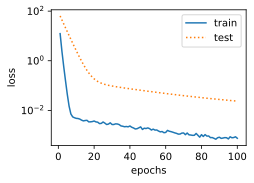

In [10]:
fit_and_plot_pytorch(3)

## 3.4 dropout

In [1]:
%matplotlib inline
import torch
import torch.nn as nn
import numpy as np
import sys
sys.path.append("..") 
import hcy_test as test

def dropout(X, drop_prob):
    X = X.float()
    assert 0 <= drop_prob <= 1
    keep_prob = 1 - drop_prob
    # 这种情况下把全部元素都丢弃
    if keep_prob == 0:
        return torch.zeros_like(X)
    mask = (torch.rand(X.shape) < keep_prob).float()
    return mask * X / keep_prob

In [2]:
X = torch.arange(16).view(2, 8)
print(dropout(X,0))
dropout(X, 0.5)

tensor([[ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11., 12., 13., 14., 15.]])


tensor([[ 0.,  2.,  0.,  6.,  8.,  0., 12.,  0.],
        [ 0.,  0.,  0., 22.,  0., 26.,  0., 30.]])

In [3]:
num_inputs, num_outputs, num_hiddens1, num_hiddens2 = 784, 10, 256, 256

W1 = torch.tensor(np.random.normal(0, 0.01, size=(num_inputs, num_hiddens1)), dtype=torch.float, requires_grad=True)
b1 = torch.zeros(num_hiddens1, requires_grad=True)
W2 = torch.tensor(np.random.normal(0, 0.01, size=(num_hiddens1, num_hiddens2)), dtype=torch.float, requires_grad=True)
b2 = torch.zeros(num_hiddens2, requires_grad=True)
W3 = torch.tensor(np.random.normal(0, 0.01, size=(num_hiddens2, num_outputs)), dtype=torch.float, requires_grad=True)
b3 = torch.zeros(num_outputs, requires_grad=True)

params = [W1, b1, W2, b2, W3, b3]

In [4]:
drop_prob1, drop_prob2 = 0.2, 0.5

def net(X, is_training=True):
    X = X.view(-1, num_inputs)
    H1 = (torch.matmul(X, W1) + b1).relu()
    if is_training:  # 只在训练模型时使用丢弃法
        H1 = dropout(H1, drop_prob1)  # 在第一层全连接后添加丢弃层
    H2 = (torch.matmul(H1, W2) + b2).relu()
    if is_training:
        H2 = dropout(H2, drop_prob2)  # 在第二层全连接后添加丢弃层
    return torch.matmul(H2, W3) + b3

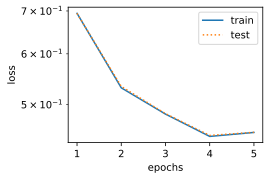

In [5]:
num_epochs, lr, batch_size = 5, 100.0, 256
loss = torch.nn.CrossEntropyLoss()
train_iter, test_iter = test.load_data_fashion_mnist(batch_size)
features,labels,test_features,test_labels=test.load_features_and_label_fashion_mnist()
# test.train_module(net, train_iter, test_iter, loss, num_epochs, batch_size, params, lr)
params=[W1, b1, W2, b2,W3,b3]
train_ls,test_ls=[],[]
for _ in range(num_epochs):
    for X, y in train_iter:
        l = loss(net(X), y).sum()

        if params is not None and params[0].grad is not None:
            for param in params:
                param.grad.data.zero_()
        l.backward()
        test.sgd(params, lr, batch_size)
    train_ls.append(loss(net(features), labels).mean().item())
    test_ls.append(loss(net(test_features), test_labels).mean().item())
test.semilogy(range(1, num_epochs + 1), train_ls, 'epochs', 'loss',
             range(1, num_epochs + 1), test_ls, ['train', 'test'])

In [7]:
net = nn.Sequential(
        test.FlattenLayer(),
        nn.Linear(num_inputs, num_hiddens1),
        nn.ReLU(),
        nn.Dropout(drop_prob1),
        nn.Linear(num_hiddens1, num_hiddens2), 
        nn.ReLU(),
        nn.Dropout(drop_prob2),
        nn.Linear(num_hiddens2, 10)
        )

for param in net.parameters():
    nn.init.normal_(param, mean=0, std=0.01)

In [8]:
import torch.optim
optimizer = torch.optim.SGD(net.parameters(), lr=0.5)
test.train_module(net, train_iter, test_iter, loss, num_epochs, batch_size, None, None, optimizer)

epoch 1, loss 0.0044, train acc 0.567, test acc 0.702
epoch 2, loss 0.0022, train acc 0.787, test acc 0.797
epoch 3, loss 0.0019, train acc 0.821, test acc 0.827
epoch 4, loss 0.0017, train acc 0.838, test acc 0.767
epoch 5, loss 0.0016, train acc 0.848, test acc 0.830


## 3.5 正向传播和反向传播


### 正向传播的计算图
正向传播是指对神经网络沿着从输入层到输出层的顺序，依次计算并存储模型的中间变量（包括输出）。为简单起见，假设输入是一个特征为$\boldsymbol{x} \in \mathbb{R}^d$的样本，且不考虑偏差项，那么中间变量

$$\boldsymbol{z} = \boldsymbol{W}^{(1)} \boldsymbol{x},$$

其中$\boldsymbol{W}^{(1)} \in \mathbb{R}^{h \times d}$是隐藏层的权重参数。把中间变量$\boldsymbol{z} \in \mathbb{R}^h$输入按元素运算的激活函数$\phi$后，将得到向量长度为$h$的隐藏层变量

$$\boldsymbol{h} = \phi (\boldsymbol{z}).$$

隐藏层变量$\boldsymbol{h}$也是一个中间变量。假设输出层参数只有权重$\boldsymbol{W}^{(2)} \in \mathbb{R}^{q \times h}$，可以得到向量长度为$q$的输出层变量

$$\boldsymbol{o} = \boldsymbol{W}^{(2)} \boldsymbol{h}.$$

假设损失函数为$\ell$，且样本标签为$y$，可以计算出单个数据样本的损失项

$$L = \ell(\boldsymbol{o}, y).$$

根据$L_2$范数正则化的定义，给定超参数$\lambda$，正则化项即

$$s = \frac{\lambda}{2} \left(\|\boldsymbol{W}^{(1)}\|_F^2 + \|\boldsymbol{W}^{(2)}\|_F^2\right),$$

其中矩阵的Frobenius范数等价于将矩阵变平为向量后计算$L_2$范数。最终，模型在给定的数据样本上带正则化的损失为

$$J = L + s.$$

我们将$J$称为有关给定数据样本的目标函数，并在以下的讨论中简称目标函数。

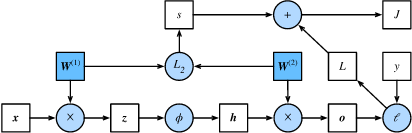

### 反向传播
反向传播指的是计算神经网络参数梯度的方法。总的来说，反向传播依据微积分中的链式法则，沿着从输出层到输入层的顺序，依次计算并存储目标函数有关神经网络各层的中间变量以及参数的梯度。对输入或输出X,Y,Z为任意形状张量的函数和，通过链式法则，我们有
$$ \frac{\partial Z}{\partial X}=\prod(\frac{\partial Z}{\partial Y},\frac{\partial Y}{\partial X})$$
回顾一下本节中样例模型，它的参数是$\boldsymbol{W}^{(1)}$和$\boldsymbol{W}^{(2)}$，因此反向传播的目标是计算$\partial J/\partial \boldsymbol{W}^{(1)}$和$\partial J/\partial \boldsymbol{W}^{(2)}$。我们将应用链式法则依次计算各中间变量和参数的梯度，其计算次序与前向传播中相应中间变量的计算次序恰恰相反。首先，分别计算目标函数$J=L+s$有关损失项$L$和正则项$s$的梯度

$$\frac{\partial J}{\partial L} = 1, \quad \frac{\partial J}{\partial s} = 1.$$

其次，依据链式法则计算目标函数有关输出层变量的梯度$\partial J/\partial \boldsymbol{o} \in \mathbb{R}^q$：

$$
\frac{\partial J}{\partial \boldsymbol{o}}
= \text{prod}\left(\frac{\partial J}{\partial L}, \frac{\partial L}{\partial \boldsymbol{o}}\right)
= \frac{\partial L}{\partial \boldsymbol{o}}.
$$


接下来，计算正则项有关两个参数的梯度：

$$\frac{\partial s}{\partial \boldsymbol{W}^{(1)}} = \lambda \boldsymbol{W}^{(1)},\quad\frac{\partial s}{\partial \boldsymbol{W}^{(2)}} = \lambda \boldsymbol{W}^{(2)}.$$


现在，我们可以计算最靠近输出层的模型参数的梯度$\partial J/\partial \boldsymbol{W}^{(2)} \in \mathbb{R}^{q \times h}$。依据链式法则，得到

$$
\frac{\partial J}{\partial \boldsymbol{W}^{(2)}}
= \text{prod}\left(\frac{\partial J}{\partial \boldsymbol{o}}, \frac{\partial \boldsymbol{o}}{\partial \boldsymbol{W}^{(2)}}\right) + \text{prod}\left(\frac{\partial J}{\partial s}, \frac{\partial s}{\partial \boldsymbol{W}^{(2)}}\right)
= \frac{\partial J}{\partial \boldsymbol{o}} \boldsymbol{h}^\top + \lambda \boldsymbol{W}^{(2)}.
$$


沿着输出层向隐藏层继续反向传播，隐藏层变量的梯度$\partial J/\partial \boldsymbol{h} \in \mathbb{R}^h$可以这样计算：

$$
\frac{\partial J}{\partial \boldsymbol{h}}
= \text{prod}\left(\frac{\partial J}{\partial \boldsymbol{o}}, \frac{\partial \boldsymbol{o}}{\partial \boldsymbol{h}}\right)
= {\boldsymbol{W}^{(2)}}^\top \frac{\partial J}{\partial \boldsymbol{o}}.
$$


由于激活函数$\phi$是按元素运算的，中间变量$\boldsymbol{z}$的梯度$\partial J/\partial \boldsymbol{z} \in \mathbb{R}^h$的计算需要使用按元素乘法符[1]$\odot$：

$$
\frac{\partial J}{\partial \boldsymbol{z}}
= \text{prod}\left(\frac{\partial J}{\partial \boldsymbol{h}}, \frac{\partial \boldsymbol{h}}{\partial \boldsymbol{z}}\right)
= \frac{\partial J}{\partial \boldsymbol{h}} \odot \phi'\left(\boldsymbol{z}\right).
$$

最终，我们可以得到最靠近输入层的模型参数的梯度$\partial J/\partial \boldsymbol{W}^{(1)} \in \mathbb{R}^{h \times d}$。依据链式法则，得到

$$
\frac{\partial J}{\partial \boldsymbol{W}^{(1)}}
= \text{prod}\left(\frac{\partial J}{\partial \boldsymbol{z}}, \frac{\partial \boldsymbol{z}}{\partial \boldsymbol{W}^{(1)}}\right) + \text{prod}\left(\frac{\partial J}{\partial s}, \frac{\partial s}{\partial \boldsymbol{W}^{(1)}}\right)
= \frac{\partial J}{\partial \boldsymbol{z}} \boldsymbol{x}^\top + \lambda \boldsymbol{W}^{(1)}.
$$
[1]发现按照元素乘法其实是哈达玛积(Hadamard product)，是矩阵的一种运算。哈达玛积首先保证矩阵的结构相同，把对应位置的数值相乘。举个例子如下
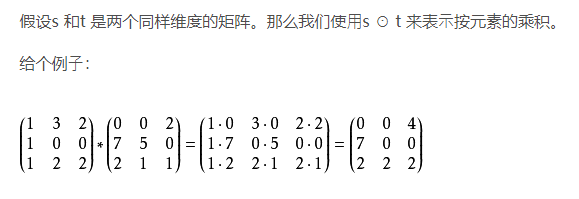

###  训练深度学习模型

在训练深度学习模型时，正向传播和反向传播之间相互依赖。下面我们仍然以本节中的样例模型分别阐述它们之间的依赖关系。

一方面，正向传播的计算可能依赖于模型参数的当前值，而这些模型参数是在反向传播的梯度计算后通过优化算法迭代的。例如，计算正则化项$s = (\lambda/2) \left(\|\boldsymbol{W}^{(1)}\|_F^2 + \|\boldsymbol{W}^{(2)}\|_F^2\right)$依赖模型参数$\boldsymbol{W}^{(1)}$和$\boldsymbol{W}^{(2)}$的当前值，而这些当前值是优化算法最近一次根据反向传播算出梯度后迭代得到的。

另一方面，反向传播的梯度计算可能依赖于各变量的当前值，而这些变量的当前值是通过正向传播计算得到的。举例来说，参数梯度$\partial J/\partial \boldsymbol{W}^{(2)} = (\partial J / \partial \boldsymbol{o}) \boldsymbol{h}^\top + \lambda \boldsymbol{W}^{(2)}$的计算需要依赖隐藏层变量的当前值$\boldsymbol{h}$。这个当前值是通过从输入层到输出层的正向传播计算并存储得到的。

因此，在模型参数初始化完成后，我们交替地进行正向传播和反向传播，并根据反向传播计算的梯度迭代模型参数。既然我们在反向传播中使用了正向传播中计算得到的中间变量来避免重复计算，那么这个复用也导致正向传播结束后不能立即释放中间变量内存。这也是训练要比预测占用更多内存的一个重要原因。另外需要指出的是，这些中间变量的个数大体上与网络层数线性相关，每个变量的大小跟批量大小和输入个数也是线性相关的，它们是导致较深的神经网络使用较大批量训练时更容易超内存的主要原因。


## 小结

* 正向传播沿着从输入层到输出层的顺序，依次计算并存储神经网络的中间变量。
* 反向传播沿着从输出层到输入层的顺序，依次计算并存储神经网络中间变量和参数的梯度。
* 在训练深度学习模型时，正向传播和反向传播相互依赖。


## 数值稳定性和模型初始化
当神经网络的层数较多时，模型的数值稳定性容易变差。假设一个层数为$L$的多层感知机的第$l$层$\boldsymbol{H}^{(l)}$的权重参数为$\boldsymbol{W}^{(l)}$，输出层$\boldsymbol{H}^{(L)}$的权重参数为$\boldsymbol{W}^{(L)}$。为了便于讨论，不考虑偏差参数，且设所有隐藏层的激活函数为恒等映射（identity mapping）$\phi(x) = x$。给定输入$\boldsymbol{X}$，多层感知机的第$l$层的输出$\boldsymbol{H}^{(l)} = \boldsymbol{X} \boldsymbol{W}^{(1)} \boldsymbol{W}^{(2)} \ldots \boldsymbol{W}^{(l)}$。此时，如果层数$l$较大，$\boldsymbol{H}^{(l)}$的计算可能会出现衰减或爆炸。举个例子，假设输入和所有层的权重参数都是标量，如权重参数为0.2和5，多层感知机的第30层输出为输入$\boldsymbol{X}$分别与$0.2^{30} \approx 1 \times 10^{-21}$（衰减）和$5^{30} \approx 9 \times 10^{20}$（爆炸）的乘积。类似地，当层数较多时，梯度的计算也更容易出现衰减或爆炸。
###  随机初始化模型参数

在神经网络中，通常需要随机初始化模型参数。下面我们来解释这样做的原因。

回顾3.8节（多层感知机）图3.3描述的多层感知机。为了方便解释，假设输出层只保留一个输出单元$o_1$（删去$o_2$和$o_3$以及指向它们的箭头），且隐藏层使用相同的激活函数。如果将每个隐藏单元的参数都初始化为相等的值，那么在正向传播时每个隐藏单元将根据相同的输入计算出相同的值，并传递至输出层。在反向传播中，每个隐藏单元的参数梯度值相等。因此，这些参数在使用基于梯度的优化算法迭代后值依然相等。之后的迭代也是如此。在这种情况下，无论隐藏单元有多少，隐藏层本质上只有1个隐藏单元在发挥作用。因此，正如在前面的实验中所做的那样，我们通常将神经网络的模型参数，特别是权重参数，进行随机初始化。
### PyTorch的默认随机初始化

随机初始化模型参数的方法有很多。在3.3节（线性回归的简洁实现）中，我们使用`torch.nn.init.normal_()`使模型`net`的权重参数采用正态分布的随机初始化方式。不过，PyTorch中`nn.Module`的模块参数都采取了较为合理的初始化策略（不同类型的layer具体采样的哪一种初始化方法的可参考[源代码](https://github.com/pytorch/pytorch/tree/master/torch/nn/modules)），因此一般不用我们考虑。


###  Xavier随机初始化

还有一种比较常用的随机初始化方法叫作Xavier随机初始化[1]。
假设某全连接层的输入个数为$a$，输出个数为$b$，Xavier随机初始化将使该层中权重参数的每个元素都随机采样于均匀分布

$$U\left(-\sqrt{\frac{6}{a+b}}, \sqrt{\frac{6}{a+b}}\right).$$

它的设计主要考虑到，模型参数初始化后，每层输出的方差不该受该层输入个数影响，且每层梯度的方差也不该受该层输出个数影响。

## 小结

* 深度模型有关数值稳定性的典型问题是衰减和爆炸。当神经网络的层数较多时，模型的数值稳定性容易变差。
* 我们通常需要随机初始化神经网络的模型参数，如权重参数。


### kaggle_practise

In [1]:
%matplotlib inline
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
import sys
sys.path.append("..") 
import hcy_test as test

print(torch.__version__)
torch.set_default_tensor_type(torch.FloatTensor)
train_data = pd.read_csv('../pytorch/house-prices-advanced-regression-techniques/train.csv')
test_data = pd.read_csv('../pytorch/house-prices-advanced-regression-techniques/test.csv')

1.12.0


In [2]:
# train_data.shape # 输出 (1460, 81)
# import pandas_profiling as ppf
# # train_data.profile_report(minimal=True)
# ppf.ProfileReport(train_data)   

In [3]:
test_data.shape # 输出 (1459, 80)

(1459, 80)

In [4]:
train_data.iloc[0:4, [0, 1, 2, 3, -3, -2, -1]]

,Id,MSSubClass,MSZoning,LotFrontage,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,WD,Normal,208500
1,2,20,RL,80.0,WD,Normal,181500
2,3,60,RL,68.0,WD,Normal,223500
3,4,70,RL,60.0,WD,Abnorml,140000


In [5]:
all_features = pd.concat((train_data.iloc[:, 1:-1], test_data.iloc[:, 1:]))
all_features.iloc[0:4,[0,1,2,3,-3,-2,-1]]


,MSSubClass,MSZoning,LotFrontage,LotArea,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,2008,WD,Normal
1,20,RL,80.0,9600,2007,WD,Normal
2,60,RL,68.0,11250,2008,WD,Normal
3,70,RL,60.0,9550,2006,WD,Abnorml


In [6]:
numeric_features = all_features.dtypes[all_features.dtypes != 'object'].index
all_features[numeric_features] = all_features[numeric_features].apply(
    lambda x: (x - x.mean()) / (x.std()))
# all_features[numeric_features] = all_features[numeric_features].fillna(0)

# count=all_features.isnull().sum().sort_values(ascending=False)
# ratio=count/len(all_features)
# nulldata=pd.concat([count,ratio],axis=1,keys=['count','ratio'])
# nulldata[nulldata.ratio>0]
str_cols = ["PoolQC" , "MiscFeature", "Alley", "Fence", "FireplaceQu", "GarageType", "GarageFinish", "GarageQual", "GarageCond",  \
            "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "MasVnrType", "MSSubClass"]
for col in str_cols:
    all_features[col].fillna("None",inplace=True)
    
del str_cols, col
num_cols=["BsmtUnfSF","TotalBsmtSF","BsmtFinSF2","BsmtFinSF1","BsmtFullBath","BsmtHalfBath", \
          "MasVnrArea","GarageCars","GarageArea","GarageYrBlt"]
for col in num_cols:
    all_features[col].fillna(0, inplace=True)
del num_cols, col
other_cols = ["MSZoning", "Electrical", "KitchenQual", "Exterior1st", "Exterior2nd", "SaleType"]
for col in other_cols:
    all_features[col].fillna(all_features[col].mode()[0], inplace=True)
    
del other_cols, col
all_features["LotFrontage"] = all_features.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))
all_features= all_features.drop(["Utilities"], axis=1)
all_features["Functional"] = all_features["Functional"].fillna("Typ")

In [7]:
# dummy_na=True将缺失值也当作合法的特征值并为其创建指示特征
all_features = pd.get_dummies(all_features, dummy_na=True)
all_features.shape # (2919, 331)

(2919, 342)

In [8]:
n_train = train_data.shape[0]
train_features = torch.tensor(all_features[:n_train].values, dtype=torch.float)
test_features = torch.tensor(all_features[n_train:].values, dtype=torch.float)
train_labels = torch.tensor(train_data.SalePrice.values, dtype=torch.float).view(-1, 1)

In [9]:
loss = torch.nn.MSELoss()

def get_net(feature_num):
    net = nn.Linear(feature_num, 1)
    for param in net.parameters():
        nn.init.normal_(param, mean=0, std=0.01)
    return net
def log_rmse(net, features, labels):
    with torch.no_grad():
        clipped_preds = torch.max(net(features), torch.tensor(1.0))
        rmse = torch.sqrt(loss(clipped_preds.log(), labels.log()))
    return rmse.item()

In [10]:
def train(net, train_features, train_labels, test_features, test_labels,
          num_epochs, learning_rate, weight_decay, batch_size):
    train_ls, test_ls = [], []
    dataset = torch.utils.data.TensorDataset(train_features, train_labels)
    train_iter = torch.utils.data.DataLoader(dataset, batch_size, shuffle=True)
    # 这里使用了Adam优化算法
    optimizer = torch.optim.Adam(params=net.parameters(), lr=learning_rate, weight_decay=weight_decay) 
    net = net.float()
    for epoch in range(num_epochs):
        for X, y in train_iter:
            l = loss(net(X.float()), y.float())
            optimizer.zero_grad()
            l.backward()
            optimizer.step()
        train_ls.append(log_rmse(net, train_features, train_labels))
        if test_labels is not None:
            test_ls.append(log_rmse(net, test_features, test_labels))
    return train_ls, test_ls

### $K$折验证
由于验证数据集不参与模型训练，当训练数据不够用时，预留大量的验证数据显得太奢侈。一种改善的方法是$K$折交叉验证（$K$-fold cross-validation）。在$K$折交叉验证中，我们把原始训练数据集分割成$K$个不重合的子数据集，然后我们做$K$次模型训练和验证。每一次，我们使用一个子数据集验证模型，并使用其他$K-1$个子数据集来训练模型。在这$K$次训练和验证中，每次用来验证模型的子数据集都不同。最后，我们对这$K$次训练误差和验证误差分别求平均。

In [11]:
def get_k_fold_data(k, i, X, y):
    # 返回第i折交叉验证时所需要的训练和验证数据
    assert k > 1
    fold_size = X.shape[0] // k
    X_train, y_train = None, None
    for j in range(k):
        idx = slice(j * fold_size, (j + 1) * fold_size)
        X_part, y_part = X[idx, :], y[idx]
        if j == i:
            X_valid, y_valid = X_part, y_part
        elif X_train is None:
            X_train, y_train = X_part, y_part
        else:
            X_train = torch.cat((X_train, X_part), dim=0)
            y_train = torch.cat((y_train, y_part), dim=0)
    return X_train, y_train, X_valid, y_valid

In [12]:
def k_fold(k, X_train, y_train, num_epochs,
           learning_rate, weight_decay, batch_size):
    train_l_sum, valid_l_sum = 0, 0
    for i in range(k):
        data = get_k_fold_data(k, i, X_train, y_train)
        net = get_net(X_train.shape[1])
        train_ls, valid_ls = train(net, *data, num_epochs, learning_rate,
                                   weight_decay, batch_size)
        train_l_sum += train_ls[-1]
        valid_l_sum += valid_ls[-1]
        if i == 0:
            test.semilogy(range(1, num_epochs + 1), train_ls, 'epochs', 'rmse',
                         range(1, num_epochs + 1), valid_ls,
                         ['train', 'valid'])
        print('fold %d, train rmse %f, valid rmse %f' % (i, train_ls[-1], valid_ls[-1]))
    return train_l_sum / k, valid_l_sum / k

fold 0, train rmse 0.462443, valid rmse 0.192133
fold 1, train rmse 0.355808, valid rmse 0.175199
fold 2, train rmse 0.356051, valid rmse 0.209603
fold 3, train rmse 0.209099, valid rmse 0.896509
fold 4, train rmse 0.342297, valid rmse 0.277508
fold 5, train rmse 0.345393, valid rmse 0.150487
fold 6, train rmse 0.369132, valid rmse 0.166997
fold 7, train rmse 0.349647, valid rmse 0.162801
fold 8, train rmse 0.344586, valid rmse 0.219496
fold 9, train rmse 0.420506, valid rmse 0.187347
10-fold validation: avg train rmse 0.355496, avg valid rmse 0.263808


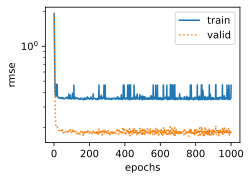

In [61]:
k, num_epochs, lr, weight_decay, batch_size = 10, 1000, 100, 4, 256
train_l, valid_l = k_fold(k, train_features, train_labels, num_epochs, lr, weight_decay, batch_size)
print('%d-fold validation: avg train rmse %f, avg valid rmse %f' % (k, train_l, valid_l))

In [56]:
def train_and_pred(train_features, test_features, train_labels, test_data,
                   num_epochs, lr, weight_decay, batch_size):
    net = get_net(train_features.shape[1])
    train_ls, _ = train(net, train_features, train_labels, None, None,
                        num_epochs, lr, weight_decay, batch_size)
    test.semilogy(range(1, num_epochs + 1), train_ls, 'epochs', 'rmse')
    print('train rmse %f' % train_ls[-1])
    preds = net(test_features).detach().numpy()
    test_data['SalePrice'] = pd.Series(preds.reshape(1, -1)[0])
    submission = pd.concat([test_data['Id'], test_data['SalePrice']], axis=1)
    submission.to_csv('./submission.csv', index=False)

train rmse 0.337680


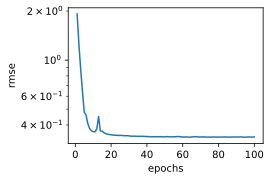

In [59]:
train_and_pred(train_features, test_features, train_labels, test_data, num_epochs, lr, weight_decay, batch_size)

# 4.1 模型构造
### 4.1.1 继承`Module`类来构造模型

In [2]:
from turtle import forward
import torch
from torch import nn
class MLP(nn.Module):
    def __init__(self) -> None:
        super().__init__()
        self.hidden=nn.Linear(784,256)
        self.act=nn.ReLU()
        self.output=nn.Linear(256,10)
    def forward(self,x):
        a=self.act(self.hidden(x))
        return self.output(a)
X = torch.rand(2, 784)
net = MLP()
print(net)
net(X)  

MLP(
  (hidden): Linear(in_features=784, out_features=256, bias=True)
  (act): ReLU()
  (output): Linear(in_features=256, out_features=10, bias=True)
)


tensor([[ 0.1867, -0.0428, -0.0955, -0.2116,  0.0597,  0.1868,  0.0512, -0.0138,
         -0.0237, -0.1033],
        [ 0.0040, -0.1176, -0.0963, -0.0776,  0.0276,  0.1337,  0.2787, -0.0704,
          0.0068, -0.1315]], grad_fn=<AddmmBackward0>)

## 4.1.2 `Module`的子类
### 4.1.2.1 `Sequential`类
当模型的前向计算为简单串联各个层的计算时，`Sequential`类可以通过更加简单的方式定义模型。这正是`Sequential`类的目的：它可以接收一个子模块的有序字典（OrderedDict）或者一系列子模块作为参数来逐一添加`Module`的实例，而模型的前向计算就是将这些实例按添加的顺序逐一计算。


In [3]:
class MySequential(nn.Module):
    from collections import OrderedDict
    def __init__(self, *args):
        super(MySequential, self).__init__()
        if len(args) == 1 and isinstance(args[0], OrderedDict): # 如果传入的是一个OrderedDict
            for key, module in args[0].items():
                self.add_module(key, module)  # add_module方法会将module添加进self._modules(一个OrderedDict)
        else:  # 传入的是一些Module
            for idx, module in enumerate(args):
                self.add_module(str(idx), module)
    def forward(self, input):
        # self._modules返回一个 OrderedDict，保证会按照成员添加时的顺序遍历成员
        for module in self._modules.values():
            input = module(input)
        return input

In [4]:
net = MySequential(
        nn.Linear(784, 256),
        nn.ReLU(),
        nn.Linear(256, 10), 
        )
print(net)
net(X)

MySequential(
  (0): Linear(in_features=784, out_features=256, bias=True)
  (1): ReLU()
  (2): Linear(in_features=256, out_features=10, bias=True)
)


tensor([[ 0.3396, -0.0602, -0.1134, -0.0771, -0.2043, -0.0567, -0.0294,  0.3179,
         -0.0482, -0.0545],
        [ 0.2972,  0.0038,  0.0721, -0.2344, -0.1457, -0.2157,  0.0456,  0.2417,
          0.0305, -0.1707]], grad_fn=<AddmmBackward0>)

### 4.1.2.2 `ModuleList`类
`ModuleList`接收一个子模块的列表作为输入，然后也可以类似List那样进行append和extend操作:

In [5]:
net = nn.ModuleList([nn.Linear(784, 256), nn.ReLU()])
net.append(nn.Linear(256, 10)) # # 类似List的append操作
print(net[-1])  # 类似List的索引访问
print(net)
# net(torch.zeros(1, 784)) # 会报NotImplementedError

Linear(in_features=256, out_features=10, bias=True)
ModuleList(
  (0): Linear(in_features=784, out_features=256, bias=True)
  (1): ReLU()
  (2): Linear(in_features=256, out_features=10, bias=True)
)


In [6]:
class MyModuleList(nn.Module):
    def __init__(self):
        super(MyModuleList, self).__init__()
        self.linears = nn.ModuleList([nn.Linear(10, 10) for i in range(10)])

    def forward(self, x):
        # ModuleList can act as an iterable, or be indexed using ints
        for i, l in enumerate(self.linears):
            x = self.linears[i // 2](x) + l(x)
        return x

另外，ModuleList不同于一般的Python的list，加入到ModuleList里面的所有模块的参数会被自动添加到整个网络中，下面看一个例子对比一下。

In [7]:
class Module_ModuleList(nn.Module):
    def __init__(self):
        super(Module_ModuleList, self).__init__()
        self.linears = nn.ModuleList([nn.Linear(10, 10)])
    
class Module_List(nn.Module):
    def __init__(self):
        super(Module_List, self).__init__()
        self.linears = [nn.Linear(10, 10)]

net1 = Module_ModuleList()
net2 = Module_List()

print("net1:")
for p in net1.parameters():
    print(p.size())

print("net2:")
for p in net2.parameters():
    print(p)

net1:
torch.Size([10, 10])
torch.Size([10])
net2:


In [8]:
net = nn.ModuleDict({
    'linear': nn.Linear(784, 256),
    'act': nn.ReLU(),
})
net['output'] = nn.Linear(256, 10) # 添加
print(net['linear']) # 访问
print(net.output)
print(net)
# net(torch.zeros(1, 784)) # 会报NotImplementedError

Linear(in_features=784, out_features=256, bias=True)
Linear(in_features=256, out_features=10, bias=True)
ModuleDict(
  (linear): Linear(in_features=784, out_features=256, bias=True)
  (act): ReLU()
  (output): Linear(in_features=256, out_features=10, bias=True)
)


### 4.1.2.3 `ModuleDict`类
`ModuleDict`接收一个子模块的字典作为输入, 然后也可以类似字典那样进行添加访问操作:

In [19]:
class MyModuleDict(nn.Module):
    def __init__(self,*args) -> None:
        super().__init__()
        self.linears=nn.ModuleDict()
        if len(args)==1 and isinstance(args[0],dict):
            for key,module in args[0].items():
                self.linears[key]=module
        else:
            for idx,module in enumerate(args):
                self.linears[str(idx)]=module
    def forward(self,input):
        for module in self.linears.values():
            input=module(input)
        return input
net=MyModuleDict(
    nn.Linear(784,256),nn.ReLU(),nn.Linear(256,10)
)
print(net.linears["0"])
net(X)

Linear(in_features=784, out_features=256, bias=True)


tensor([[-0.1859, -0.0470, -0.0318, -0.1788, -0.0411,  0.0545, -0.0257,  0.0066,
         -0.1075, -0.0946],
        [ 0.0082,  0.0736, -0.0156, -0.1562, -0.0718,  0.0478, -0.2347, -0.0894,
          0.0024, -0.0593]], grad_fn=<AddmmBackward0>)

In [22]:
class FancyMLP(nn.Module):
    def __init__(self, **kwargs):
        super(FancyMLP, self).__init__(**kwargs)
        
        self.rand_weight = torch.rand((20, 20), requires_grad=False) # 不可训练参数（常数参数）
        self.linear = nn.Linear(20, 20)

    def forward(self, x):
        x = self.linear(x)
        # 使用创建的常数参数，以及nn.functional中的relu函数和mm函数
        x = nn.functional.relu(torch.mm(x, self.rand_weight.data) + 1)
        
        # 复用全连接层。等价于两个全连接层共享参数
        x = self.linear(x)
        # 控制流，这里我们需要调用item函数来返回标量进行比较
        while x.norm().item() > 1:# .norm 求范数
            x /= 2
        if x.norm().item() < 0.8:
            x *= 10
        return x.sum()
X = torch.rand(2, 20)
net = FancyMLP()
print(net)
net(X)

FancyMLP(
  (linear): Linear(in_features=20, out_features=20, bias=True)
)


tensor(8.1634, grad_fn=<SumBackward0>)

In [23]:
class NestMLP(nn.Module):
    def __init__(self, **kwargs):
        super(NestMLP, self).__init__(**kwargs)
        self.net = nn.Sequential(nn.Linear(40, 30), nn.ReLU()) 

    def forward(self, x):
        return self.net(x)

net = nn.Sequential(NestMLP(), nn.Linear(30, 20), FancyMLP())

X = torch.rand(2, 40)
print(net)
net(X)

Sequential(
  (0): NestMLP(
    (net): Sequential(
      (0): Linear(in_features=40, out_features=30, bias=True)
      (1): ReLU()
    )
  )
  (1): Linear(in_features=30, out_features=20, bias=True)
  (2): FancyMLP(
    (linear): Linear(in_features=20, out_features=20, bias=True)
  )
)


tensor(-8.1946, grad_fn=<SumBackward0>)

# 4.2 模型参数的访问、初始化和共享
我们通过`init`模块来初始化模型的参数。我们也介绍了访问模型参数的简单方法。本节将深入讲解如何访问和初始化模型参数，以及如何在多个层之间共享同一份模型参数。

我们先定义一个与上一节中相同的含单隐藏层的多层感知机。我们依然使用默认方式初始化它的参数，并做一次前向计算。与之前不同的是，在这里我们从`nn`中导入了`init`模块，它包含了多种模型初始化方法。

In [24]:
import torch
from torch import nn
from torch.nn import init

net = nn.Sequential(nn.Linear(4, 3), nn.ReLU(), nn.Linear(3, 1))  # pytorch已进行默认初始化

print(net)
X = torch.rand(2, 4)
Y = net(X).sum()

Sequential(
  (0): Linear(in_features=4, out_features=3, bias=True)
  (1): ReLU()
  (2): Linear(in_features=3, out_features=1, bias=True)
)


In [25]:
print(type(net.named_parameters()))
for name, param in net.named_parameters():
    print(name, param.size())

<class 'generator'>
0.weight torch.Size([3, 4])
0.bias torch.Size([3])
2.weight torch.Size([1, 3])
2.bias torch.Size([1])


In [26]:
for name, param in net[0].named_parameters():
    print(name, param.size(), type(param))

weight torch.Size([3, 4]) <class 'torch.nn.parameter.Parameter'>
bias torch.Size([3]) <class 'torch.nn.parameter.Parameter'>


因为这里是单层的所以没有了层数索引的前缀。另外返回的param的类型为torch.nn.parameter.Parameter，其实这是Tensor的子类，和Tensor不同的是如果一个Tensor是Parameter，那么它会自动被添加到模型的参数列表里，来看下面这个例子。



上面的代码中weight1在参数列表中但是weight2却没在参数列表中。

因为Parameter是Tensor，即Tensor拥有的属性它都有，比如可以根据data来访问参数数值，用grad来访问参数梯度。

In [27]:
class MyModel(nn.Module):
    def __init__(self, **kwargs):
        super(MyModel, self).__init__(**kwargs)
        self.weight1 = nn.Parameter(torch.rand(20, 20))
        self.weight2 = torch.rand(20, 20)
    def forward(self, x):
        pass
    
n = MyModel()
for name, param in n.named_parameters():
    print(name)

weight1


上面的代码中weight1在参数列表中但是weight2却没在参数列表中。

因为Parameter是Tensor，即Tensor拥有的属性它都有，比如可以根据data来访问参数数值，用grad来访问参数梯度。

In [28]:
weight_0 = list(net[0].parameters())[0]
print(weight_0.data)
print(weight_0.grad) # 反向传播前梯度为None
Y.backward()
print(weight_0.grad)

tensor([[-0.1076, -0.0567, -0.1737,  0.1729],
        [-0.3145,  0.4322, -0.3641, -0.3960],
        [ 0.0829,  0.0782, -0.3653,  0.3726]])
None
tensor([[-0.0648, -0.1301, -0.1037, -0.1366],
        [ 0.0000,  0.0000,  0.0000,  0.0000],
        [-0.3206, -0.6433, -0.5129, -0.6755]])


### 4.2.2 初始化模型参数
我们在3.15节（数值稳定性和模型初始化）中提到了PyTorch中nn.Module的模块参数都采取了较为合理的初始化策略（不同类型的layer具体采样的哪一种初始化方法的可参考源代码）。但我们经常需要使用其他方法来初始化权重。PyTorch的init模块里提供了多种预设的初始化方法。在下面的例子中，我们将权重参数初始化成均值为0、标准差为0.01的正态分布随机数，并依然将偏差参数清零。

In [29]:
for name, param in net.named_parameters():
    if 'weight' in name:
        init.normal_(param, mean=0, std=0.01)
        print(name, param.data)

0.weight tensor([[ 1.4205e-03, -1.6024e-04, -2.0126e-07,  6.3134e-03],
        [-1.4683e-03,  2.5437e-03,  1.9925e-02,  1.6543e-02],
        [ 1.4574e-02,  1.1392e-02,  1.1963e-03,  1.3683e-02]])
2.weight tensor([[ 0.0036,  0.0071, -0.0138]])


In [30]:
for name, param in net.named_parameters():
    if 'bias' in name:
        init.constant_(param, val=0)
        print(name, param.data)

0.bias tensor([0., 0., 0.])
2.bias tensor([0.])


## 4.2.3 自定义初始化方法

有时候我们需要的初始化方法并没有在`init`模块中提供。这时，可以实现一个初始化方法，从而能够像使用其他初始化方法那样使用它。在这之前我们先来看看PyTorch是怎么实现这些初始化方法的，例如`torch.nn.init.normal_`：


In [ ]:
def normal_(tensor, mean=0, std=1):
    with torch.no_grad():
        return tensor.normal_(mean, std)

可以看到这就是一个inplace改变`Tensor`值的函数，而且这个过程是不记录梯度的。
类似的我们来实现一个自定义的初始化方法。在下面的例子里，我们令权重有一半概率初始化为0，有另一半概率初始化为$[-10,-5]$和$[5,10]$两个区间里均匀分布的随机数。

In [31]:
def init_weight_(tensor):
    with torch.no_grad():
        tensor.uniform_(-10, 10)
        tensor *= (tensor.abs() >= 5).float()

for name, param in net.named_parameters():
    if 'weight' in name:
        init_weight_(param)
        print(name, param.data)
    if 'bias' in name:
        param.data += 1
        print(name, param.data)

   

0.weight tensor([[ 8.5497,  0.0000,  0.0000,  8.7920],
        [-0.0000, -0.0000,  7.5995, -0.0000],
        [-0.0000,  0.0000, -9.9527,  6.2070]])
0.bias tensor([1., 1., 1.])
2.weight tensor([[0.0000, 8.1466, -0.0000]])
2.bias tensor([1.])


## 4.2.4 共享模型参数

在有些情况下，我们希望在多个层之间共享模型参数。4.1.3节提到了如何共享模型参数: `Module`类的`forward`函数里多次调用同一个层。此外，如果我们传入`Sequential`的模块是同一个`Module`实例的话参数也是共享的，下面来看一个例子: 


In [32]:
linear = nn.Linear(1, 1, bias=False)
net = nn.Sequential(linear, linear) 
print(net)
for name, param in net.named_parameters():
    init.constant_(param, val=3)
    print(name, param.data)
print(id(net[0]) == id(net[1]))
print(id(net[0].weight) == id(net[1].weight))

Sequential(
  (0): Linear(in_features=1, out_features=1, bias=False)
  (1): Linear(in_features=1, out_features=1, bias=False)
)
0.weight tensor([[3.]])
True
True


因为模型参数里包含了梯度，所以在反向传播计算时，这些共享的参数的梯度是累加的:

In [33]:
x = torch.ones(1, 1)
y = net(x).sum()
print(y)
y.backward()
print(net[0].weight.grad) # 单次梯度是3，两次所以就是6

tensor(9., grad_fn=<SumBackward0>)
tensor([[6.]])


# 4.4 自定义层

深度学习的一个魅力在于神经网络中各式各样的层，例如全连接层和后面章节中将要介绍的卷积层、池化层与循环层。虽然PyTorch提供了大量常用的层，但有时候我们依然希望自定义层。本节将介绍如何使用`Module`来自定义层，从而可以被重复调用。

## 4.4.1 不含模型参数的自定义层

我们先介绍如何定义一个不含模型参数的自定义层。事实上，这和4.1节（模型构造）中介绍的使用`Module`类构造模型类似。下面的`CenteredLayer`类通过继承`Module`类自定义了一个将输入减掉均值后输出的层，并将层的计算定义在了`forward`函数里。这个层里不含模型参数。


In [1]:
import torch
from torch import nn

class CenteredLayer(nn.Module):
    def __init__(self, **kwargs):
        super(CenteredLayer, self).__init__(**kwargs)
    def forward(self, x):
        return x - x.mean()

In [2]:
layer = CenteredLayer()
layer(torch.tensor([1, 2, 3, 4, 5], dtype=torch.float))

tensor([-2., -1.,  0.,  1.,  2.])

In [3]:
net = nn.Sequential(nn.Linear(8, 128), CenteredLayer())
y = net(torch.rand(4, 8))
y.mean().item()

-1.862645149230957e-09

## 4.4.2 含模型参数的自定义层

我们还可以自定义含模型参数的自定义层。其中的模型参数可以通过训练学出。

在4.2节（模型参数的访问、初始化和共享）中介绍了`Parameter`类其实是`Tensor`的子类，如果一个`Tensor`是`Parameter`，那么它会自动被添加到模型的参数列表里。所以在自定义含模型参数的层时，我们应该将参数定义成`Parameter`，除了像4.2.1节那样直接定义成`Parameter`类外，还可以使用`ParameterList`和`ParameterDict`分别定义参数的列表和字典。
`ParameterList`接收一个`Parameter`实例的列表作为输入然后得到一个参数列表，使用的时候可以用索引来访问某个参数，另外也可以使用`append`和`extend`在列表后面新增参数。

In [12]:
class MyListDense(nn.Module):
    def __init__(self):
        super(MyListDense, self).__init__()
        self.params = nn.ParameterList([nn.Parameter(torch.randn(4, 4)) for i in range(3)])
        self.params.append(nn.Parameter(torch.randn(4, 1)))

    def forward(self, x):
        for i in range(len(self.params)):
            x = torch.mm(x, self.params[i])
        return x
net = MyListDense()
print(net)
for params in net.parameters():
    print(params)

MyListDense(
  (params): ParameterList(
      (0): Parameter containing: [torch.FloatTensor of size 4x4]
      (1): Parameter containing: [torch.FloatTensor of size 4x4]
      (2): Parameter containing: [torch.FloatTensor of size 4x4]
      (3): Parameter containing: [torch.FloatTensor of size 4x1]
  )
)
Parameter containing:
tensor([[-1.2449,  2.0852, -0.3498, -0.7980],
        [ 0.3876,  0.2137, -1.1089,  0.3074],
        [ 0.8029,  0.7946, -0.0034, -1.9221],
        [ 1.4331, -0.9981, -0.1160,  0.8585]], requires_grad=True)
Parameter containing:
tensor([[ 0.8364,  1.1412,  0.2049, -0.8782],
        [-0.3379,  0.3166,  0.3802,  1.2082],
        [ 0.6896, -0.4508, -0.6356,  0.4536],
        [ 2.4832,  0.1344, -0.4876,  0.2860]], requires_grad=True)
Parameter containing:
tensor([[-0.1160,  0.1041,  0.2726,  0.4726],
        [-0.6698,  0.0506, -0.2200, -1.0230],
        [ 0.3878,  0.6406,  0.2485,  0.2965],
        [ 1.0311, -1.0630, -1.2428,  1.4770]], requires_grad=True)
Parameter con

而`ParameterDict`接收一个`Parameter`实例的字典作为输入然后得到一个参数字典，然后可以按照字典的规则使用了。例如使用`update()`新增参数，使用`keys()`返回所有键值，使用`items()`返回所有键值对等等，可参考[官方文档](https://pytorch.org/docs/stable/nn.html#parameterdict)。


In [9]:
class MyDictDense(nn.Module):
    def __init__(self):
        super(MyDictDense, self).__init__()
        self.params = nn.ParameterDict({
                'linear1': nn.Parameter(torch.randn(4, 4)),
                'linear2': nn.Parameter(torch.randn(4, 1))
        })
        self.params.update({'linear3': nn.Parameter(torch.randn(4, 2))}) # 新增

    def forward(self, x, choice='linear1'):
        return torch.mm(x, self.params[choice])

net = MyDictDense()
X=torch.rand(4,4)
print(net(X,'linear3'))

tensor([[-2.0291,  2.6500],
        [-0.6196,  0.7725],
        [-1.5321,  2.2058],
        [-0.8887,  1.7739]], grad_fn=<MmBackward0>)


我们也可以使用自定义层构造模型。它和PyTorch的其他层在使用上很类似。

In [14]:
net = nn.Sequential(
    MyDictDense(),
    MyListDense(),
)
print(net)
print(net(X))

Sequential(
  (0): MyDictDense(
    (params): ParameterDict(
        (linear1): Parameter containing: [torch.FloatTensor of size 4x4]
        (linear2): Parameter containing: [torch.FloatTensor of size 4x1]
        (linear3): Parameter containing: [torch.FloatTensor of size 4x2]
    )
  )
  (1): MyListDense(
    (params): ParameterList(
        (0): Parameter containing: [torch.FloatTensor of size 4x4]
        (1): Parameter containing: [torch.FloatTensor of size 4x4]
        (2): Parameter containing: [torch.FloatTensor of size 4x4]
        (3): Parameter containing: [torch.FloatTensor of size 4x1]
    )
  )
)
tensor([[24.2220],
        [11.4844],
        [19.8526],
        [13.4408]], grad_fn=<MmBackward0>)


# 4.5 读取和存储

到目前为止，我们介绍了如何处理数据以及如何构建、训练和测试深度学习模型。然而在实际中，我们有时需要把训练好的模型部署到很多不同的设备。在这种情况下，我们可以把内存中训练好的模型参数存储在硬盘上供后续读取使用。


## 4.5.1 读写`Tensor`

我们可以直接使用`save`函数和`load`函数分别存储和读取`Tensor`。`save`使用Python的pickle实用程序将对象进行序列化，然后将序列化的对象保存到disk，使用`save`可以保存各种对象,包括模型、张量和字典等。而`load`使用pickle unpickle工具将pickle的对象文件反序列化为内存。

下面的例子创建了`Tensor`变量`x`，并将其存在文件名同为`x.pt`的文件里。


In [15]:
import torch
from torch import nn

x = torch.ones(3)
torch.save(x, 'tmp.pt')
x2=torch.load('tmp.pt')
x2


tensor([1., 1., 1.])

In [16]:
y = torch.zeros(4)
torch.save([x, y], 'xy.pt')
xy_list = torch.load('xy.pt')
xy_list

[tensor([1., 1., 1.]), tensor([0., 0., 0., 0.])]

In [17]:
torch.save({'x': x, 'y': y}, 'xy_dict.pt')
xy = torch.load('xy_dict.pt')
xy

{'x': tensor([1., 1., 1.]), 'y': tensor([0., 0., 0., 0.])}

## 4.5.2 读写模型

### 4.5.2.1 `state_dict`
在PyTorch中，`Module`的可学习参数(即权重和偏差)，模块模型包含在参数中(通过`model.parameters()`访问)。`state_dict`是一个从参数名称隐射到参数`Tesnor`的字典对象。

In [18]:
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.hidden = nn.Linear(3, 2)
        self.act = nn.ReLU()
        self.output = nn.Linear(2, 1)

    def forward(self, x):
        a = self.act(self.hidden(x))
        return self.output(a)

net = MLP()
net.state_dict()

OrderedDict([('hidden.weight',
              tensor([[ 0.1266, -0.0662, -0.1628],
                      [ 0.4914, -0.0954, -0.3826]])),
             ('hidden.bias', tensor([-0.5594,  0.1954])),
             ('output.weight', tensor([[-0.3839, -0.5939]])),
             ('output.bias', tensor([-0.3173]))])

注意，只有具有可学习参数的层(卷积层、线性层等)才有`state_dict`中的条目。优化器(`optim`)也有一个`state_dict`，其中包含关于优化器状态以及所使用的超参数的信息。

In [1]:
class FancyMLP(nn.Module):
    def __init__(self, **kwargs):
        super(FancyMLP, self).__init__(**kwargs)
        
        self.rand_weight = torch.ones((20, 20), requires_grad=False) # 不可训练参数（常数参数）
        self.linear = nn.Linear(20, 20)

    def forward(self, x):
        x = self.linear(x)
        # 使用创建的常数参数，以及nn.functional中的relu函数和mm函数
        x = nn.functional.relu(torch.mm(x, self.rand_weight.data) + 1)
        
        # 复用全连接层。等价于两个全连接层共享参数
        x = self.linear(x)
        # 控制流，这里我们需要调用item函数来返回标量进行比较
        while x.norm().item() > 1:# .norm 求范数
            x /= 2
        if x.norm().item() < 0.8:
            x *= 10
        return x.sum()
X = torch.rand(2, 20)
net = FancyMLP()

NameError: name 'nn' is not defined

In [19]:
optimizer = torch.optim.SGD(net.parameters(), lr=0.001, momentum=0.9)
optimizer.state_dict()

{'state': {},
 'param_groups': [{'lr': 0.001,
   'momentum': 0.9,
   'dampening': 0,
   'weight_decay': 0,
   'nesterov': False,
   'maximize': False,
   'foreach': None,
   'params': [0, 1, 2, 3]}]}

### 4.5.2.2 保存和加载模型
PyTorch中保存和加载训练模型有两种常见的方法:
1. 仅保存和加载模型参数(`state_dict`)；
2. 保存和加载整个模型。
#### 1. 保存和加载`state_dict`(推荐方式)
保存：
``` python
torch.save(model.state_dict(), PATH) # 推荐的文件后缀名是pt或pth
```
加载：
``` python
model = TheModelClass(*args, **kwargs)
model.load_state_dict(torch.load(PATH))
```

#### 2. 保存和加载整个模型
保存：
``` python
torch.save(model, PATH)
```
加载：
``` python
model = torch.load(PATH)
```

In [23]:
X = torch.rand(2, 20)
net = FancyMLP()
Y=net(X)

PATH = "./net.pt"
torch.save(net.state_dict(), PATH)

net2 = FancyMLP()
net2.load_state_dict(torch.load(PATH))
Y2 = net2(X)
Y2 == Y

tensor(True)

# 5.1 二维卷积层

卷积神经网络（convolutional neural network）是含有卷积层（convolutional layer）的神经网络。本章中介绍的卷积神经网络均使用最常见的二维卷积层。它有高和宽两个空间维度，常用来处理图像数据。本节中，我们将介绍简单形式的二维卷积层的工作原理。


## 5.1.1 二维互相关运算

虽然卷积层得名于卷积（convolution）运算，但我们通常在卷积层中使用更加直观的互相关（cross-correlation）运算。在二维卷积层中，一个二维输入数组和一个二维核（kernel）数组通过互相关运算输出一个二维数组。
我们用一个具体例子来解释二维互相关运算的含义。如图5.1所示，输入是一个高和宽均为3的二维数组。我们将该数组的形状记为$3 \times 3$或（3，3）。核数组的高和宽分别为2。该数组在卷积计算中又称卷积核或过滤器（filter）。卷积核窗口（又称卷积窗口）的形状取决于卷积核的高和宽，即$2 \times 2$。图5.1中的阴影部分为第一个输出元素及其计算所使用的输入和核数组元素：$0\times0+1\times1+3\times2+4\times3=19$。

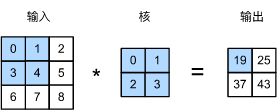

在二维互相关运算中，卷积窗口从输入数组的最左上方开始，按从左往右、从上往下的顺序，依次在输入数组上滑动。当卷积窗口滑动到某一位置时，窗口中的输入子数组与核数组按元素相乘并求和，得到输出数组中相应位置的元素。图5.1中的输出数组高和宽分别为2，其中的4个元素由二维互相关运算得出：

$$
0\times0+1\times1+3\times2+4\times3=19,\\
1\times0+2\times1+4\times2+5\times3=25,\\
3\times0+4\times1+6\times2+7\times3=37,\\
4\times0+5\times1+7\times2+8\times3=43.\\
$$

下面我们将上述过程实现在`corr2d`函数里。它接受输入数组`X`与核数组`K`，并输出数组`Y`。


In [2]:
import sys
import torch
from torch import nn
sys.path.append("..")
import hcy_test as test
X = torch.tensor([[0, 1, 2], [3, 4, 5], [6, 7, 8]])
K = torch.tensor([[0, 1], [2, 3]])
test.corr2d(X, K)

tensor([[19., 25.],
        [37., 43.]])

In [3]:
class Conv2D(nn.Module):
    def __init__(self, kernel_size):
        super(Conv2D, self).__init__()
        self.weight = nn.Parameter(torch.randn(kernel_size))
        self.bias = nn.Parameter(torch.randn(1))

    def forward(self, x):
        return test.corr2d(x, self.weight) + self.bias

In [4]:
X = torch.ones(6, 8)
X[:, 2:6] = 0
X

tensor([[1., 1., 0., 0., 0., 0., 1., 1.],
        [1., 1., 0., 0., 0., 0., 1., 1.],
        [1., 1., 0., 0., 0., 0., 1., 1.],
        [1., 1., 0., 0., 0., 0., 1., 1.],
        [1., 1., 0., 0., 0., 0., 1., 1.],
        [1., 1., 0., 0., 0., 0., 1., 1.]])

In [5]:
K = torch.tensor([[1, -1]])

In [7]:
Y = test.corr2d(X, K)
Y

tensor([[ 0.,  1.,  0.,  0.,  0., -1.,  0.],
        [ 0.,  1.,  0.,  0.,  0., -1.,  0.],
        [ 0.,  1.,  0.,  0.,  0., -1.,  0.],
        [ 0.,  1.,  0.,  0.,  0., -1.,  0.],
        [ 0.,  1.,  0.,  0.,  0., -1.,  0.],
        [ 0.,  1.,  0.,  0.,  0., -1.,  0.]])

In [19]:
# 构造一个核数组形状是(1, 2)的二维卷积层
conv2d = Conv2D(kernel_size=(1, 2))

step = 20
lr = 0.01
for i in range(step):
    Y_hat = conv2d(X)
    l = ((Y_hat - Y) ** 2).sum()
    l.backward()
    
    # 梯度下降
    conv2d.weight.data -= lr * conv2d.weight.grad
    conv2d.bias.data -= lr * conv2d.bias.grad
    
    # 梯度清0
    conv2d.weight.grad.fill_(0)
    conv2d.bias.grad.fill_(0)
    if (i + 1) % 5 == 0:
        print('Step %d, loss %.3f' % (i + 1, l.item()))

Step 5, loss 0.219
Step 10, loss 0.042
Step 15, loss 0.010
Step 20, loss 0.002


In [20]:
print("weight: ", conv2d.weight.data)
print("bias: ", conv2d.bias.data)

weight:  tensor([[ 0.9896, -0.9860]])
bias:  tensor([-0.0020])


## 5.1.5 互相关运算和卷积运算

实际上，卷积运算与互相关运算类似。**为了得到卷积运算的输出，我们只需将核数组左右翻转并上下翻转，再与输入数组做互相关运算**。可见，卷积运算和互相关运算虽然类似，但如果它们使用相同的核数组，对于同一个输入，输出往往并不相同。

那么，你也许会好奇卷积层为何能使用互相关运算替代卷积运算。其实，在深度学习中核数组都是学出来的：卷积层无论使用互相关运算或卷积运算都不影响模型预测时的输出。为了解释这一点，假设卷积层使用互相关运算学出图5.1中的核数组。设其他条件不变，使用卷积运算学出的核数组即图5.1中的核数组按上下、左右翻转。也就是说，图5.1中的输入与学出的已翻转的核数组再做卷积运算时，依然得到图5.1中的输出。为了与大多数深度学习文献一致，如无特别说明，本书中提到的卷积运算均指互相关运算。

> 注：感觉深度学习中的卷积运算实际上是互相关运算是个面试题考点。
> 两个函数f(x)和h(x)的互相关，由含参变量x的无穷积分定义，即$R_{fh}(x)=\int_{-\infty}^{\infty}f^{*}(x^{`}+x)h(x^{`}+x)dx^{`}$类似于卷积，这里，参变量x和积分变量x′均为实数，函数f(x)和h(x)可以是实数，也可以是复数 [1]。

## 5.1.6 特征图和感受野

二维卷积层输出的二维数组可以看作是输入在空间维度（宽和高）上某一级的表征，也叫特征图（feature map）。影响元素$x$的前向计算的所有可能输入区域（可能大于输入的实际尺寸）叫做$x$的感受野（receptive field）。以图5.1为例，输入中阴影部分的四个元素是输出中阴影部分元素的感受野。我们将图5.1中形状为$2 \times 2$的输出记为$Y$，并考虑一个更深的卷积神经网络：将$Y$与另一个形状为$2 \times 2$的核数组做互相关运算，输出单个元素$z$。那么，$z$在$Y$上的感受野包括$Y$的全部四个元素，在输入上的感受野包括其中全部9个元素。可见，我们可以通过更深的卷积神经网络使特征图中单个元素的感受野变得更加广阔，从而捕捉输入上更大尺寸的特征。

我们常使用“元素”一词来描述数组或矩阵中的成员。在神经网络的术语中，这些元素也可称为“单元”。当含义明确时，本书不对这两个术语做严格区分。


## 小结

* 二维卷积层的核心计算是二维互相关运算。在最简单的形式下，它对二维输入数据和卷积核做互相关运算然后加上偏差。
* 我们可以设计卷积核来检测图像中的边缘。
* 我们可以通过数据来学习卷积核。

# 5.2 填充和步幅

在上一节的例子里，我们使用高和宽为3的输入与高和宽为2的卷积核得到高和宽为2的输出。一般来说，假设输入形状是$n_h\times n_w$，卷积核窗口形状是$k_h\times k_w$，那么输出形状将会是

$$(n_h-k_h+1) \times (n_w-k_w+1).$$

所以卷积层的输出形状由输入形状和卷积核窗口形状决定。本节我们将介绍卷积层的两个超参数，即填充和步幅。它们可以对给定形状的输入和卷积核改变输出形状。

## 5.2.1 填充

填充（padding）是指在输入高和宽的两侧填充元素（通常是0元素）。图5.2里我们在原输入高和宽的两侧分别添加了值为0的元素，使得输入高和宽从3变成了5，并导致输出高和宽由2增加到4。图5.2中的阴影部分为第一个输出元素及其计算所使用的输入和核数组元素：$0\times0+0\times1+0\times2+0\times3=0$。
<div align=center>
<img width="400" src="graphic/5.2_conv_pad.svg"/>
</div>
<div align=center>图5.2 在输入的高和宽两侧分别填充了0元素的二维互相关计算</div>

一般来说，如果在高的两侧一共填充$p_h$行，在宽的两侧一共填充$p_w$列，那么输出形状将会是

$$(n_h-k_h+p_h+1)\times(n_w-k_w+p_w+1),$$

也就是说，输出的高和宽会分别增加$p_h$和$p_w$。

在很多情况下，我们会设置$p_h=k_h-1$和$p_w=k_w-1$来使输入和输出具有相同的高和宽。这样会方便在构造网络时推测每个层的输出形状。假设这里$k_h$是奇数，我们会在高的两侧分别填充$p_h/2$行。如果$k_h$是偶数，一种可能是在输入的顶端一侧填充$\lceil p_h/2\rceil$行，而在底端一侧填充$\lfloor p_h/2\rfloor$行。在宽的两侧填充同理。

卷积神经网络经常使用奇数高宽的卷积核，如1、3、5和7，所以两端上的填充个数相等。对任意的二维数组`X`，设它的第`i`行第`j`列的元素为`X[i,j]`。当两端上的填充个数相等，并使输入和输出具有相同的高和宽时，我们就知道输出`Y[i,j]`是由输入以`X[i,j]`为中心的窗口同卷积核进行互相关计算得到的。


In [24]:
import torch
from torch import nn

# 定义一个函数来计算卷积层。它对输入和输出做相应的升维和降维
def comp_conv2d(conv2d, X):
    # (1, 1)代表批量大小和通道数（“多输入通道和多输出通道”一节将介绍）均为1 ## 嵌套两个维度（套两个中括号）
    X = X.view((1, 1) + X.shape)
    Y = conv2d(X)
    return Y.view(Y.shape[2:])  # 排除不关心的前两维：批量和通道

# 注意这里是两侧分别填充1行或列，所以在两侧一共填充2行或列
conv2d = nn.Conv2d(in_channels=1, out_channels=1, kernel_size=3, padding=1)

X = torch.rand(8, 8)

comp_conv2d(conv2d, X).shape

torch.Size([8, 8])

## 5.2.2 步幅

在上一节里我们介绍了二维互相关运算。卷积窗口从输入数组的最左上方开始，按从左往右、从上往下的顺序，依次在输入数组上滑动。我们将每次滑动的行数和列数称为步幅（stride）。

目前我们看到的例子里，在高和宽两个方向上步幅均为1。我们也可以使用更大步幅。图5.3展示了在高上步幅为3、在宽上步幅为2的二维互相关运算。可以看到，输出第一列第二个元素时，卷积窗口向下滑动了3行，而在输出第一行第二个元素时卷积窗口向右滑动了2列。当卷积窗口在输入上再向右滑动2列时，由于输入元素无法填满窗口，无结果输出。图5.3中的阴影部分为输出元素及其计算所使用的输入和核数组元素：$0\times0+0\times1+1\times2+2\times3=8$、$0\times0+6\times1+0\times2+0\times3=6$。

<div align=center>
<img width="400" src="graphic/5.2_conv_stride.svg"/>
</div>
<div align=center>图5.3 高和宽上步幅分别为3和2的二维互相关运算</div>

一般来说，当高上步幅为$s_h$，宽上步幅为$s_w$时，输出形状为

$$\lfloor(n_h-k_h+p_h+s_h)/s_h\rfloor \times \lfloor(n_w-k_w+p_w+s_w)/s_w\rfloor.$$

如果设置$p_h=k_h-1$和$p_w=k_w-1$，那么输出形状将简化为$\lfloor(n_h+s_h-1)/s_h\rfloor \times \lfloor(n_w+s_w-1)/s_w\rfloor$。更进一步，如果输入的高和宽能分别被高和宽上的步幅整除，那么输出形状将是$(n_h/s_h) \times (n_w/s_w)$。

下面我们令高和宽上的步幅均为2，从而使输入的高和宽减半。

In [25]:
conv2d = nn.Conv2d(1, 1, kernel_size=3, padding=1, stride=2)
comp_conv2d(conv2d, X).shape

torch.Size([4, 4])

In [26]:
conv2d = nn.Conv2d(1, 1, kernel_size=(3, 5), padding=(0, 1), stride=(3, 4))
comp_conv2d(conv2d, X).shape

torch.Size([2, 2])

# 5.3 多输入通道和多输出通道

前面两节里我们用到的输入和输出都是二维数组，但真实数据的维度经常更高。例如，彩色图像在高和宽2个维度外还有RGB（红、绿、蓝）3个颜色通道。假设彩色图像的高和宽分别是$h$和$w$（像素），那么它可以表示为一个$3\times h\times w$的多维数组。我们将大小为3的这一维称为通道（channel）维。本节我们将介绍含多个输入通道或多个输出通道的卷积核。



## 5.3.1 多输入通道

当输入数据含多个通道时，我们需要构造一个输入通道数与输入数据的通道数相同的卷积核，从而能够与含多通道的输入数据做互相关运算。假设输入数据的通道数为$c_i$，那么卷积核的输入通道数同样为$c_i$。设卷积核窗口形状为$k_h\times k_w$。当$c_i=1$时，我们知道卷积核只包含一个形状为$k_h\times k_w$的二维数组。当$c_i > 1$时，我们将会为每个输入通道各分配一个形状为$k_h\times k_w$的核数组。把这$c_i$个数组在输入通道维上连结，即得到一个形状为$c_i\times k_h\times k_w$的卷积核。由于输入和卷积核各有$c_i$个通道，我们可以在各个通道上对输入的二维数组和卷积核的二维核数组做互相关运算，再将这$c_i$个互相关运算的二维输出按通道相加，得到一个二维数组。这就是含多个通道的输入数据与多输入通道的卷积核做二维互相关运算的输出。

图5.4展示了含2个输入通道的二维互相关计算的例子。在每个通道上，二维输入数组与二维核数组做互相关运算，再按通道相加即得到输出。图5.4中阴影部分为第一个输出元素及其计算所使用的输入和核数组元素：$(1\times1+2\times2+4\times3+5\times4)+(0\times0+1\times1+3\times2+4\times3)=56$。

<div align=center>
<img width="400" src="graphic/5.3_conv_multi_in.svg"/>
</div>
<div align=center>图5.4 含2个输入通道的互相关计算</div>


接下来我们实现含多个输入通道的互相关运算。我们只需要对每个通道做互相关运算，然后通过`add_n`函数来进行累加。

In [32]:
import torch
from torch import nn
import sys
sys.path.append("..") 
import hcy_test as test

def corr2d_multi_in(X, K):
    # 沿着X和K的第0维（通道维）分别计算再相加
    res = test.corr2d(X[0, :, :], K[0, :, :])
    for i in range(1, X.shape[0]):
        res += test.corr2d(X[i, :, :], K[i, :, :])
    return res

In [33]:
X = torch.tensor([[[0, 1, 2], [3, 4, 5], [6, 7, 8]],
              [[1, 2, 3], [4, 5, 6], [7, 8, 9]]])
K = torch.tensor([[[0, 1], [2, 3]], [[1, 2], [3, 4]]])

corr2d_multi_in(X, K)

tensor([[ 56.,  72.],
        [104., 120.]])

## 5.3.2 多输出通道

当输入通道有多个时，因为我们对各个通道的结果做了累加，所以不论输入通道数是多少，输出通道数总是为1。设卷积核输入通道数和输出通道数分别为$c_i$和$c_o$，高和宽分别为$k_h$和$k_w$。如果希望得到含多个通道的输出，我们可以为每个输出通道分别创建形状为$c_i\times k_h\times k_w$的核数组。将它们在输出通道维上连结，卷积核的形状即$c_o\times c_i\times k_h\times k_w$。在做互相关运算时，每个输出通道上的结果由卷积核在该输出通道上的核数组与整个输入数组计算而来。

下面我们实现一个互相关运算函数来计算多个通道的输出。

In [34]:
def corr2d_multi_in_out(X, K):
    # 对K的第0维遍历，每次同输入X做互相关计算。所有结果使用stack函数合并在一起
    return torch.stack([corr2d_multi_in(X, k) for k in K])

In [39]:
K = torch.stack([K, K + 1, K + 2])
K.shape # torch.Size([3, 2, 2, 2])

torch.Size([3, 2, 3, 1, 1])

In [36]:
corr2d_multi_in_out(X, K)

tensor([[[ 56.,  72.],
         [104., 120.]],

        [[ 76., 100.],
         [148., 172.]],

        [[ 96., 128.],
         [192., 224.]]])

## 5.3.3 $1\times 1$卷积层

最后我们讨论卷积窗口形状为$1\times 1$（$k_h=k_w=1$）的多通道卷积层。我们通常称之为$1\times 1$卷积层，并将其中的卷积运算称为$1\times 1$卷积。因为使用了最小窗口，$1\times 1$卷积失去了卷积层可以识别高和宽维度上相邻元素构成的模式的功能。实际上，$1\times 1$卷积的主要计算发生在通道维上。图5.5展示了使用输入通道数为3、输出通道数为2的$1\times 1$卷积核的互相关计算。值得注意的是，输入和输出具有相同的高和宽。输出中的每个元素来自输入中在高和宽上相同位置的元素在不同通道之间的按权重累加。假设我们将通道维当作特征维，将高和宽维度上的元素当成数据样本，**那么$1\times 1$卷积层的作用与全连接层等价**。

<div align=center>
<img width="400" src="graphic/5.3_conv_1x1.svg"/>
</div>
<div align=center>图5.5 1x1卷积核的互相关计算。输入和输出具有相同的高和宽</div>


下面我们使用全连接层中的矩阵乘法来实现$1\times 1$卷积。这里需要在矩阵乘法运算前后对数据形状做一些调整。

In [7]:
def corr2d_multi_in_out_1x1(X, K):
    c_i, h, w = X.shape
    print(X)
    c_o = K.shape[0]
    X = X.view(c_i, h * w)
    print(X)
    K = K.view(c_o, c_i)
    print(K)
    Y = torch.mm(K, X)  # 全连接层的矩阵乘法
    return Y.view(c_o, h, w)

In [54]:
X = torch.rand(3, 3, 3)
K = torch.rand(2, 3, 1, 1)

Y1 = corr2d_multi_in_out_1x1(X, K)
Y2 = corr2d_multi_in_out(X, K)
print(Y1)
(Y1 - Y2).norm().item() < 1e-6

tensor([[[0.4185, 0.2709, 0.2441],
         [0.4880, 0.0924, 0.0833],
         [0.2745, 0.4635, 0.9200]],

        [[0.6879, 0.1653, 0.9611],
         [0.4095, 0.7421, 0.6653],
         [0.0967, 0.5769, 0.2176]],

        [[0.4769, 0.8415, 0.4325],
         [0.1140, 0.1085, 0.9823],
         [0.1066, 0.6087, 0.8368]]])
tensor([[0.4185, 0.2709, 0.2441, 0.4880, 0.0924, 0.0833, 0.2745, 0.4635, 0.9200],
        [0.6879, 0.1653, 0.9611, 0.4095, 0.7421, 0.6653, 0.0967, 0.5769, 0.2176],
        [0.4769, 0.8415, 0.4325, 0.1140, 0.1085, 0.9823, 0.1066, 0.6087, 0.8368]])
tensor([[0.0322, 0.4660, 0.4906],
        [0.6459, 0.3201, 0.2822]])
tensor([[[0.5680, 0.4986, 0.6679],
         [0.2624, 0.4020, 0.7946],
         [0.1062, 0.5824, 0.5415]],

        [[0.6251, 0.4654, 0.5874],
         [0.4785, 0.3278, 0.5440],
         [0.2383, 0.6558, 0.9001]]])


True

# 5.4 池化层

在图像物体边缘检测应用中，构造卷积核从而精确地找到了像素变化的位置。设任意二维数组`X`的`i`行`j`列的元素为`X[i, j]`。如果我们构造的卷积核输出`Y[i, j]=1`，那么说明输入中`X[i, j]`和`X[i, j+1]`数值不一样。这可能意味着物体边缘通过这两个元素之间。但实际图像里，我们感兴趣的物体不会总出现在固定位置：即使我们连续拍摄同一个物体也极有可能出现像素位置上的偏移。这会导致同一个边缘对应的输出可能出现在卷积输出`Y`中的不同位置，进而对后面的模式识别造成不便。

在本节中我们介绍池化（pooling）层，它的提出是**为了缓解卷积层对位置的过度敏感性**。
## 5.4.1 二维最大池化层和平均池化层

同卷积层一样，池化层每次对输入数据的一个固定形状窗口（又称池化窗口）中的元素计算输出。不同于卷积层里计算输入和核的互相关性，池化层直接计算池化窗口内元素的最大值或者平均值。该运算也分别叫做最大池化或平均池化。在二维最大池化中，池化窗口从输入数组的最左上方开始，按从左往右、从上往下的顺序，依次在输入数组上滑动。当池化窗口滑动到某一位置时，窗口中的输入子数组的最大值即输出数组中相应位置的元素。
<div align=center>
<img width="300" src="graphic/5.4_pooling.svg"/>
</div>
<div align=center>图5.6 池化窗口形状为 2 x 2 的最大池化</div>

图5.6展示了池化窗口形状为$2\times 2$的最大池化，阴影部分为第一个输出元素及其计算所使用的输入元素。输出数组的高和宽分别为2，其中的4个元素由取最大值运算$\text{max}$得出：

$$
\max(0,1,3,4)=4,\\
\max(1,2,4,5)=5,\\
\max(3,4,6,7)=7,\\
\max(4,5,7,8)=8.\\
$$


二维平均池化的工作原理与二维最大池化类似，但将最大运算符替换成平均运算符。池化窗口形状为$p \times q$的池化层称为$p \times q$池化层，其中的池化运算叫作$p \times q$池化。

让我们再次回到本节开始提到的物体边缘检测的例子。现在我们将卷积层的输出作为$2\times 2$最大池化的输入。设该卷积层输入是`X`、池化层输出为`Y`。无论是`X[i, j]`和`X[i, j+1]`值不同，还是`X[i, j+1]`和`X[i, j+2]`不同，池化层输出均有`Y[i, j]=1`。也就是说，使用$2\times 2$最大池化层时，只要卷积层识别的模式在高和宽上移动不超过一个元素，我们依然可以将它检测出来。

下面把池化层的前向计算实现在`pool2d`函数里。它跟5.1节（二维卷积层）里`corr2d`函数非常类似，唯一的区别在计算输出`Y`上。


In [55]:
import torch
from torch import nn

def pool2d(X, pool_size, mode='max'):
    X = X.float()
    p_h, p_w = pool_size
    Y = torch.zeros(X.shape[0] - p_h + 1, X.shape[1] - p_w + 1)
    for i in range(Y.shape[0]):
        for j in range(Y.shape[1]):
            if mode == 'max':
                Y[i, j] = X[i: i + p_h, j: j + p_w].max()
            elif mode == 'avg':
                Y[i, j] = X[i: i + p_h, j: j + p_w].mean()       
    return Y

In [56]:
X = torch.tensor([[0, 1, 2], [3, 4, 5], [6, 7, 8]])
pool2d(X, (2, 2))

tensor([[4., 5.],
        [7., 8.]])

In [57]:
pool2d(X, (2, 2), 'avg')

tensor([[2., 3.],
        [5., 6.]])

## 5.4.2 填充和步幅

同卷积层一样，池化层也可以在输入的高和宽两侧的填充并调整窗口的移动步幅来改变输出形状。池化层填充和步幅与卷积层填充和步幅的工作机制一样。我们将通过`nn`模块里的二维最大池化层`MaxPool2d`来演示池化层填充和步幅的工作机制。我们先构造一个形状为(1, 1, 4, 4)的输入数据，前两个维度分别是批量和通道。

In [73]:
X = torch.arange(16, dtype=torch.float).view((1, 1, 4, 4))
X

tensor([[[[ 0.,  1.,  2.,  3.],
          [ 4.,  5.,  6.,  7.],
          [ 8.,  9., 10., 11.],
          [12., 13., 14., 15.]]]])

In [60]:
pool2d = nn.MaxPool2d(3)
pool2d(X) 

tensor([[[[10.]]]])

In [61]:
pool2d = nn.MaxPool2d(3, padding=1, stride=2)
pool2d(X)

tensor([[[[ 5.,  7.],
          [13., 15.]]]])

## 5.4.3 多通道

在处理多通道输入数据时，**池化层对每个输入通道分别池化，而不是像卷积层那样将各通道的输入按通道相加**。这意味着池化层的输出通道数与输入通道数相等。下面将数组`X`和`X+1`在通道维上连结来构造通道数为2的输入。


In [74]:
X = torch.cat((X, X + 1), dim=1)
X

tensor([[[[ 0.,  1.,  2.,  3.],
          [ 4.,  5.,  6.,  7.],
          [ 8.,  9., 10., 11.],
          [12., 13., 14., 15.]],

         [[ 1.,  2.,  3.,  4.],
          [ 5.,  6.,  7.,  8.],
          [ 9., 10., 11., 12.],
          [13., 14., 15., 16.]]]])

In [75]:
pool2d = nn.MaxPool2d(3, padding=1, stride=2)
pool2d(X)

tensor([[[[ 5.,  7.],
          [13., 15.]],

         [[ 6.,  8.],
          [14., 16.]]]])

## 小结

* 最大池化和平均池化分别取池化窗口中输入元素的最大值和平均值作为输出。
* 池化层的一个主要作用是缓解卷积层对位置的过度敏感性。
* 可以指定池化层的填充和步幅。
* 池化层的输出通道数跟输入通道数相同。



# 5.5 卷积神经网络（LeNet）

在3.9节（多层感知机的从零开始实现）里我们构造了一个含单隐藏层的多层感知机模型来对Fashion-MNIST数据集中的图像进行分类。每张图像高和宽均是28像素。我们将图像中的像素逐行展开，得到长度为784的向量，并输入进全连接层中。然而，这种分类方法有一定的局限性。

1. 图像在同一列邻近的像素在这个向量中可能相距较远。它们构成的模式可能难以被模型识别。
2. 对于大尺寸的输入图像，使用全连接层容易造成模型过大。假设输入是高和宽均为1000像素的彩色照片（含3个通道）。即使全连接层输出个数仍是256，该层权重参数的形状是$3,000,000\times 256$：它占用了大约3 GB的内存或显存。这带来过复杂的模型和过高的存储开销。

卷积层尝试解决这两个问题。一方面，卷积层保留输入形状，使图像的像素在高和宽两个方向上的相关性均可能被有效识别；另一方面，卷积层通过滑动窗口将同一卷积核与不同位置的输入重复计算，从而避免参数尺寸过大。

卷积神经网络就是含卷积层的网络。本节里我们将介绍一个早期用来识别手写数字图像的卷积神经网络：LeNet [1]。这个名字来源于LeNet论文的第一作者Yann LeCun。LeNet展示了通过梯度下降训练卷积神经网络可以达到手写数字识别在当时最先进的结果。这个奠基性的工作第一次将卷积神经网络推上舞台，为世人所知。LeNet的网络结构如下图所示。

<div align=center>
<img width="600" src="graphic/5.5_lenet.png"/>
</div>
<div align=center>LeNet网络结构</div>

## 5.5.1 LeNet模型

LeNet分为卷积层块和全连接层块两个部分。下面我们分别介绍这两个模块。

卷积层块里的基本单位是卷积层后接最大池化层：卷积层用来识别图像里的空间模式，如线条和物体局部，之后的最大池化层则用来降低卷积层对位置的敏感性。卷积层块由两个这样的基本单位重复堆叠构成。在卷积层块中，每个卷积层都使用$5\times 5$的窗口，并在输出上使用sigmoid激活函数。第一个卷积层输出通道数为6，第二个卷积层输出通道数则增加到16。这是因为第二个卷积层比第一个卷积层的输入的高和宽要小，所以增加输出通道使两个卷积层的参数尺寸类似。卷积层块的两个最大池化层的窗口形状均为$2\times 2$，且步幅为2。由于池化窗口与步幅形状相同，池化窗口在输入上每次滑动所覆盖的区域互不重叠。

卷积层块的输出形状为(批量大小, 通道, 高, 宽)。当卷积层块的输出传入全连接层块时，全连接层块会将小批量中每个样本变平（flatten）。也就是说，全连接层的输入形状将变成二维，其中第一维是小批量中的样本，第二维是每个样本变平后的向量表示，且向量长度为通道、高和宽的乘积。全连接层块含3个全连接层。它们的输出个数分别是120、84和10，其中10为输出的类别个数。

下面我们通过`Sequential`类来实现LeNet模型。


In [6]:
import time
import torch
from torch import nn, optim
import sys
sys.path.append("..")
import hcy_test as test
net=test.LeNet()
print(net)

LeNet(
  (conv): Sequential(
    (0): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
    (1): Sigmoid()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
    (4): Sigmoid()
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc): Sequential(
    (0): Linear(in_features=256, out_features=120, bias=True)
    (1): Sigmoid()
    (2): Linear(in_features=120, out_features=84, bias=True)
    (3): Sigmoid()
    (4): Linear(in_features=84, out_features=10, bias=True)
  )
)


In [4]:
batch_size = 256
train_iter, test_iter = test.load_data_fashion_mnist(batch_size=batch_size)

In [7]:
lr, num_epochs = 0.001, 5
optimizer = torch.optim.Adam(net.parameters(), lr=lr)
loss = torch.nn.CrossEntropyLoss()
test.train_module(net, train_iter, test_iter, loss, num_epochs, batch_size,
              params=None, lr=None, optimizer=optimizer)

epoch 1, loss 0.0072, train acc 0.333, test acc 0.583
epoch 2, loss 0.0037, train acc 0.641, test acc 0.686
epoch 3, loss 0.0029, train acc 0.720, test acc 0.732
epoch 4, loss 0.0026, train acc 0.742, test acc 0.748
epoch 5, loss 0.0024, train acc 0.759, test acc 0.760


# 5.6 深度卷积神经网络（AlexNet）

在LeNet提出后的将近20年里，神经网络一度被其他机器学习方法超越，如支持向量机。虽然LeNet可以在早期的小数据集上取得好的成绩，但是在更大的真实数据集上的表现并不尽如人意。一方面，神经网络计算复杂。虽然20世纪90年代也有过一些针对神经网络的加速硬件，但并没有像之后GPU那样大量普及。因此，训练一个多通道、多层和有大量参数的卷积神经网络在当年很难完成。另一方面，当年研究者还没有大量深入研究参数初始化和非凸优化算法等诸多领域，导致复杂的神经网络的训练通常较困难。

我们在上一节看到，神经网络可以直接基于图像的原始像素进行分类。这种称为端到端（end-to-end）的方法节省了很多中间步骤。然而，在很长一段时间里更流行的是研究者通过勤劳与智慧所设计并生成的手工特征。这类图像分类研究的主要流程是：

1. 获取图像数据集；
2. 使用已有的特征提取函数生成图像的特征；
3. 使用机器学习模型对图像的特征分类。

当时认为的机器学习部分仅限最后这一步。如果那时候跟机器学习研究者交谈，他们会认为机器学习既重要又优美。优雅的定理证明了许多分类器的性质。机器学习领域生机勃勃、严谨而且极其有用。然而，如果跟计算机视觉研究者交谈，则是另外一幅景象。他们会告诉你图像识别里“不可告人”的现实是：计算机视觉流程中真正重要的是数据和特征。也就是说，使用较干净的数据集和较有效的特征甚至比机器学习模型的选择对图像分类结果的影响更大。


## 5.6.1 学习特征表示

既然特征如此重要，它该如何表示呢？

我们已经提到，在相当长的时间里，特征都是基于各式各样手工设计的函数从数据中提取的。事实上，不少研究者通过提出新的特征提取函数不断改进图像分类结果。这一度为计算机视觉的发展做出了重要贡献。

然而，另一些研究者则持异议。他们认为特征本身也应该由学习得来。他们还相信，为了表征足够复杂的输入，特征本身应该分级表示。持这一想法的研究者相信，多层神经网络可能可以学得数据的多级表征，并逐级表示越来越抽象的概念或模式。以图像分类为例，并回忆5.1节（二维卷积层）中物体边缘检测的例子。在多层神经网络中，图像的第一级的表示可以是在特定的位置和⻆度是否出现边缘；而第二级的表示说不定能够将这些边缘组合出有趣的模式，如花纹；在第三级的表示中，也许上一级的花纹能进一步汇合成对应物体特定部位的模式。这样逐级表示下去，最终，模型能够较容易根据最后一级的表示完成分类任务。需要强调的是，输入的逐级表示由多层模型中的参数决定，而这些参数都是学出来的。

尽管一直有一群执着的研究者不断钻研，试图学习视觉数据的逐级表征，然而很长一段时间里这些野心都未能实现。这其中有诸多因素值得我们一一分析。


### 5.6.1.1 缺失要素一：数据

包含许多特征的深度模型需要大量的有标签的数据才能表现得比其他经典方法更好。限于早期计算机有限的存储和90年代有限的研究预算，大部分研究只基于小的公开数据集。例如，不少研究论文基于加州大学欧文分校（UCI）提供的若干个公开数据集，其中许多数据集只有几百至几千张图像。这一状况在2010年前后兴起的大数据浪潮中得到改善。特别是，2009年诞生的ImageNet数据集包含了1,000大类物体，每类有多达数千张不同的图像。这一规模是当时其他公开数据集无法与之相提并论的。ImageNet数据集同时推动计算机视觉和机器学习研究进入新的阶段，使此前的传统方法不再有优势。


### 5.6.1.2 缺失要素二：硬件

深度学习对计算资源要求很高。早期的硬件计算能力有限，这使训练较复杂的神经网络变得很困难。然而，通用GPU的到来改变了这一格局。很久以来，GPU都是为图像处理和计算机游戏设计的，尤其是针对大吞吐量的矩阵和向量乘法从而服务于基本的图形变换。值得庆幸的是，这其中的数学表达与深度网络中的卷积层的表达类似。通用GPU这个概念在2001年开始兴起，涌现出诸如OpenCL和CUDA之类的编程框架。这使得GPU也在2010年前后开始被机器学习社区使用。


## 5.6.2 AlexNet

2012年，AlexNet横空出世。这个模型的名字来源于论文第一作者的姓名Alex Krizhevsky [1]。AlexNet使用了8层卷积神经网络，并以很大的优势赢得了ImageNet 2012图像识别挑战赛。它首次证明了学习到的特征可以超越手工设计的特征，从而一举打破计算机视觉研究的前状。

<div align=center>
<img width="600" src="graphic/5.6_alexnet.png"/>
</div>
<div align=center>AlexNet网络结构</div>

AlexNet与LeNet的设计理念非常相似，但也有显著的区别。

第一，与相对较小的LeNet相比，AlexNet包含8层变换，其中有5层卷积和2层全连接隐藏层，以及1个全连接输出层。下面我们来详细描述这些层的设计。

AlexNet第一层中的卷积窗口形状是$11\times11$。因为ImageNet中绝大多数图像的高和宽均比MNIST图像的高和宽大10倍以上，ImageNet图像的物体占用更多的像素，所以需要更大的卷积窗口来捕获物体。第二层中的卷积窗口形状减小到$5\times5$，之后全采用$3\times3$。此外，第一、第二和第五个卷积层之后都使用了窗口形状为$3\times3$、步幅为2的最大池化层。而且，AlexNet使用的卷积通道数也大于LeNet中的卷积通道数数十倍。

紧接着最后一个卷积层的是两个输出个数为4096的全连接层。这两个巨大的全连接层带来将近1 GB的模型参数。由于早期显存的限制，最早的AlexNet使用双数据流的设计使一个GPU只需要处理一半模型。幸运的是，显存在过去几年得到了长足的发展，因此通常我们不再需要这样的特别设计了。

第二，AlexNet将sigmoid激活函数改成了更加简单的ReLU激活函数。一方面，ReLU激活函数的计算更简单，例如它并没有sigmoid激活函数中的求幂运算。另一方面，ReLU激活函数在不同的参数初始化方法下使模型更容易训练。这是由于当sigmoid激活函数输出极接近0或1时，这些区域的梯度几乎为0，从而造成反向传播无法继续更新部分模型参数；而ReLU激活函数在正区间的梯度恒为1。因此，若模型参数初始化不当，sigmoid函数可能在正区间得到几乎为0的梯度，从而令模型无法得到有效训练。

第三，AlexNet通过丢弃法（参见3.13节）来控制全连接层的模型复杂度。而LeNet并没有使用丢弃法。

第四，AlexNet引入了大量的图像增广，如翻转、裁剪和颜色变化，从而进一步扩大数据集来缓解过拟合。我们将在后面的9.1节（图像增广）详细介绍这种方法。

下面我们实现稍微简化过的AlexNet。

In [1]:
import time
import torch
from torch import nn, optim
import sys
sys.path.append("..")
import hcy_test as test
net = test.AlexNet()
print(net)

AlexNet(
  (conv): Sequential(
    (0): Conv2d(1, 96, kernel_size=(11, 11), stride=(4, 4))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(96, 256, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(256, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU()
    (8): Conv2d(384, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU()
    (10): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU()
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc): Sequential(
    (0): Linear(in_features=6400, out_features=4096, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.5, inplace=False)
    (3): Linear(in_features=4096, out_features=4096, bias=True)
    (4): ReLU()
    (5): Dropout(p=0.5, inplace=False)
    (

In [5]:
batch_size = 256
resize=224
train_iter, test_iter = test.load_data_fashion_mnist(batch_size,resize)

235


In [ ]:
lr, num_epochs = 0.001, 5
optimizer = torch.optim.Adam(net.parameters(), lr=lr)
loss = torch.nn.CrossEntropyLoss()
test.train_module_time(net, train_iter, test_iter, loss, num_epochs, batch_size,
              params=None, lr=None, optimizer=optimizer)
### 实际没跑出来，使用kaggle的cuda跑出来结果如下

```
training on  cuda
epoch 1, loss 0.6361, train acc 0.756, test acc 0.866, time 60.8 sec
epoch 2, loss 0.3413, train acc 0.874, test acc 0.859, time 59.1 sec
epoch 3, loss 0.2958, train acc 0.890, test acc 0.896, time 58.3 sec
epoch 4, loss 0.2624, train acc 0.902, test acc 0.902, time 59.6 sec
epoch 5, loss 0.2407, train acc 0.911, test acc 0.908, time 59.2 sec
```

# 5.7 使用重复元素的网络（VGG）

AlexNet在LeNet的基础上增加了3个卷积层。但AlexNet作者对它们的卷积窗口、输出通道数和构造顺序均做了大量的调整。虽然AlexNet指明了深度卷积神经网络可以取得出色的结果，但并没有提供简单的规则以指导后来的研究者如何设计新的网络。我们将在本章的后续几节里介绍几种不同的深度网络设计思路。

本节介绍VGG，它的名字来源于论文作者所在的实验室Visual Geometry Group [1]。VGG提出了可以通过重复使用简单的基础块来构建深度模型的思路。

## 5.7.1 VGG块

VGG块的组成规律是：连续使用数个相同的填充为1、窗口形状为$3\times 3$的卷积层后接上一个步幅为2、窗口形状为$2\times 2$的最大池化层。卷积层保持输入的高和宽不变，而池化层则对其减半。我们使用`vgg_block`函数来实现这个基础的VGG块，它可以指定卷积层的数量和输入输出通道数。

> 对于给定的感受野（与输出有关的输入图片的局部大小），采用堆积的小卷积核优于采用大的卷积核，因为可以增加网络深度来保证学习更复杂的模式，而且代价还比较小（参数更少）。例如，在VGG中，使用了3个3x3卷积核来代替7x7卷积核，使用了2个3x3卷积核来代替5*5卷积核，这样做的主要目的是在保证具有相同感知野的条件下，提升了网络的深度，在一定程度上提升了神经网络的效果。


In [9]:
import time
import torch
from torch import nn, optim

import sys
sys.path.append("..") 

def vgg_block(num_convs, in_channels, out_channels):
    blk = []
    for i in range(num_convs):
        if i == 0:
            blk.append(nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1))
        else:
            blk.append(nn.Conv2d(out_channels, out_channels, kernel_size=3, padding=1))
        blk.append(nn.ReLU())
    blk.append(nn.MaxPool2d(kernel_size=2, stride=2)) # 这里会使宽高减半
    return nn.Sequential(*blk)

In [7]:
conv_arch = ((1, 1, 64), (1, 64, 128), (2, 128, 256), (2, 256, 512), (2, 512, 512))
# 经过5个vgg_block, 宽高会减半5次, 变成 224/32 = 7
fc_features = 512 * 7 * 7 # c * w * h
fc_hidden_units = 4096 # 任意

In [10]:
def vgg(conv_arch, fc_features, fc_hidden_units=4096):
    net = nn.Sequential()
    # 卷积层部分
    for i, (num_convs, in_channels, out_channels) in enumerate(conv_arch):
        # 每经过一个vgg_block都会使宽高减半
        net.add_module("vgg_block_" + str(i+1), vgg_block(num_convs, in_channels, out_channels))
    # 全连接层部分
    net.add_module("fc", nn.Sequential(test.FlattenLayer(),
                                 nn.Linear(fc_features, fc_hidden_units),
                                 nn.ReLU(),
                                 nn.Dropout(0.5),
                                 nn.Linear(fc_hidden_units, fc_hidden_units),
                                 nn.ReLU(),
                                 nn.Dropout(0.5),
                                 nn.Linear(fc_hidden_units, 10)
                                ))
    return net

In [11]:
net = vgg(conv_arch, fc_features, fc_hidden_units)
X = torch.rand(1, 1, 224, 224)

# named_children获取一级子模块及其名字(named_modules会返回所有子模块,包括子模块的子模块)
for name, blk in net.named_children(): 
    X = blk(X)
    print(name, 'output shape: ', X.shape)

vgg_block_1 output shape:  torch.Size([1, 64, 112, 112])
vgg_block_2 output shape:  torch.Size([1, 128, 56, 56])
vgg_block_3 output shape:  torch.Size([1, 256, 28, 28])
vgg_block_4 output shape:  torch.Size([1, 512, 14, 14])
vgg_block_5 output shape:  torch.Size([1, 512, 7, 7])
fc output shape:  torch.Size([1, 10])


In [12]:
ratio = 8
small_conv_arch = [(1, 1, 64//ratio), (1, 64//ratio, 128//ratio), (2, 128//ratio, 256//ratio), 
                   (2, 256//ratio, 512//ratio), (2, 512//ratio, 512//ratio)]
net = vgg(small_conv_arch, fc_features // ratio, fc_hidden_units // ratio)
print(net)

Sequential(
  (vgg_block_1): Sequential(
    (0): Conv2d(1, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (vgg_block_2): Sequential(
    (0): Conv2d(8, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (vgg_block_3): Sequential(
    (0): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (vgg_block_4): Sequential(
    (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [ ]:
batch_size = 64
# 如出现“out of memory”的报错信息，可减小batch_size或resize
train_iter, test_iter = test.load_data_fashion_mnist(batch_size, resize=224)

lr, num_epochs = 0.001, 5
optimizer = torch.optim.Adam(net.parameters(), lr=lr)
loss = torch.nn.CrossEntropyLoss()
test.train_module_time(net, train_iter, test_iter, loss, num_epochs, batch_size,
              params=None, lr=None, optimizer=optimizer)

# 5.8 网络中的网络（NiN）

前几节介绍的LeNet、AlexNet和VGG在设计上的共同之处是：先以由卷积层构成的模块充分抽取空间特征，再以由全连接层构成的模块来输出分类结果。其中，AlexNet和VGG对LeNet的改进主要在于如何对这两个模块加宽（增加通道数）和加深。本节我们介绍网络中的网络（NiN）[1]。它提出了另外一个思路，即串联多个由卷积层和“全连接”层构成的小网络来构建一个深层网络。


## 5.8.1 NiN块

我们知道，卷积层的输入和输出通常是四维数组（样本，通道，高，宽），而全连接层的输入和输出则通常是二维数组（样本，特征）。如果想在全连接层后再接上卷积层，则需要将全连接层的输出变换为四维。回忆在5.3节（多输入通道和多输出通道）里介绍的$1\times 1$卷积层。它可以看成全连接层，其中空间维度（高和宽）上的每个元素相当于样本，通道相当于特征。因此，NiN使用$1\times 1$卷积层来替代全连接层，从而使空间信息能够自然传递到后面的层中去。图5.7对比了NiN同AlexNet和VGG等网络在结构上的主要区别。

<div align=center>
<img width="250" src="graphic/5.8_nin.svg"/>
</div>
<div align=center>图5.7 左图是AlexNet和VGG的网络结构局部，右图是NiN的网络结构局部</div>


NiN块是NiN中的基础块。它由一个卷积层加两个充当全连接层的$1\times 1$卷积层串联而成。其中第一个卷积层的超参数可以自行设置，而第二和第三个卷积层的超参数一般是固定的。

``` python

In [14]:
import time
import torch
from torch import nn, optim

import sys
sys.path.append("..") 
import hcy_test as test
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

def nin_block(in_channels, out_channels, kernel_size, stride, padding):
    blk = nn.Sequential(nn.Conv2d(in_channels, out_channels, kernel_size, stride, padding),
                        nn.ReLU(),
                        nn.Conv2d(out_channels, out_channels, kernel_size=1),
                        nn.ReLU(),
                        nn.Conv2d(out_channels, out_channels, kernel_size=1),
                        nn.ReLU())
    return blk

## 5.8.2 NiN模型

NiN是在AlexNet问世不久后提出的。它们的卷积层设定有类似之处。NiN使用卷积窗口形状分别为$11\times 11$、$5\times 5$和$3\times 3$的卷积层，相应的输出通道数也与AlexNet中的一致。每个NiN块后接一个步幅为2、窗口形状为$3\times 3$的最大池化层。

除使用NiN块以外，NiN还有一个设计与AlexNet显著不同：NiN去掉了AlexNet最后的3个全连接层，取而代之地，NiN使用了输出通道数等于标签类别数的NiN块，然后使用全局平均池化层对每个通道中所有元素求平均并直接用于分类。这里的全局平均池化层即窗口形状等于输入空间维形状的平均池化层。NiN的这个设计的好处是可以显著减小模型参数尺寸，从而缓解过拟合。然而，该设计有时会造成获得有效模型的训练时间的增加。


In [17]:
import torch.nn.functional as F
class GlobalAvgPool2d(nn.Module):
    # 全局平均池化层可通过将池化窗口形状设置成输入的高和宽实现
    def __init__(self):
        super(GlobalAvgPool2d, self).__init__()
    def forward(self, x):
        return F.avg_pool2d(x, kernel_size=x.size()[2:])

net = nn.Sequential(
    nin_block(1, 96, kernel_size=11, stride=4, padding=0),
    nn.MaxPool2d(kernel_size=3, stride=2),
    nin_block(96, 256, kernel_size=5, stride=1, padding=2),
    nn.MaxPool2d(kernel_size=3, stride=2),
    nin_block(256, 384, kernel_size=3, stride=1, padding=1),
    nn.MaxPool2d(kernel_size=3, stride=2), 
    nn.Dropout(0.5),
    # 标签类别数是10
    nin_block(384, 10, kernel_size=3, stride=1, padding=1),
    GlobalAvgPool2d(), 
    # 将四维的输出转成二维的输出，其形状为(批量大小, 10)
    test.FlattenLayer())

In [18]:
X = torch.rand(1, 1, 224, 224)
for name, blk in net.named_children(): 
    X = blk(X)
    print(name, 'output shape: ', X.shape)

0 output shape:  torch.Size([1, 96, 54, 54])
1 output shape:  torch.Size([1, 96, 26, 26])
2 output shape:  torch.Size([1, 256, 26, 26])
3 output shape:  torch.Size([1, 256, 12, 12])
4 output shape:  torch.Size([1, 384, 12, 12])
5 output shape:  torch.Size([1, 384, 5, 5])
6 output shape:  torch.Size([1, 384, 5, 5])
7 output shape:  torch.Size([1, 10, 5, 5])
8 output shape:  torch.Size([1, 10, 1, 1])
9 output shape:  torch.Size([1, 10])


# 5.9 含并行连结的网络（GoogLeNet）

在2014年的ImageNet图像识别挑战赛中，一个名叫GoogLeNet的网络结构大放异彩 [1]。它虽然在名字上向LeNet致敬，但在网络结构上已经很难看到LeNet的影子。GoogLeNet吸收了NiN中网络串联网络的思想，并在此基础上做了很大改进。在随后的几年里，研究人员对GoogLeNet进行了数次改进，本节将介绍这个模型系列的第一个版本。


## 5.9.1 Inception 块

GoogLeNet中的基础卷积块叫作Inception块，得名于同名电影《盗梦空间》（Inception）。与上一节介绍的NiN块相比，这个基础块在结构上更加复杂，如图5.8所示。

<div align=center>
<img width="500" src="../img/chapter05/5.9_inception.svg"/>
</div>
<div align=center>图5.8 Inception块的结构</div>

由图5.8可以看出，Inception块里有4条并行的线路。前3条线路使用窗口大小分别是$1\times 1$、$3\times 3$和$5\times 5$的卷积层来抽取不同空间尺寸下的信息，其中中间2个线路会对输入先做$1\times 1$卷积来减少输入通道数，以降低模型复杂度。第四条线路则使用$3\times 3$最大池化层，后接$1\times 1$卷积层来改变通道数。4条线路都使用了合适的填充来使输入与输出的高和宽一致。最后我们将每条线路的输出在通道维上连结，并输入接下来的层中去。

Inception块中可以自定义的超参数是每个层的输出通道数，我们以此来控制模型复杂度。


In [16]:
import time
import torch
from torch import nn, optim
import torch.nn.functional as F

import sys
sys.path.append("..") 
import hcy_test as test
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

class Inception(nn.Module):
    # c1 - c4为每条线路里的层的输出通道数
    def __init__(self, in_c, c1, c2, c3, c4):
        super(Inception, self).__init__()
        # 线路1，单1 x 1卷积层
        self.p1_1 = nn.Conv2d(in_c, c1, kernel_size=1)
        # 线路2，1 x 1卷积层后接3 x 3卷积层
        self.p2_1 = nn.Conv2d(in_c, c2[0], kernel_size=1)
        self.p2_2 = nn.Conv2d(c2[0], c2[1], kernel_size=3, padding=1)
        # 线路3，1 x 1卷积层后接5 x 5卷积层
        self.p3_1 = nn.Conv2d(in_c, c3[0], kernel_size=1)
        self.p3_2 = nn.Conv2d(c3[0], c3[1], kernel_size=5, padding=2)
        # 线路4，3 x 3最大池化层后接1 x 1卷积层
        self.p4_1 = nn.MaxPool2d(kernel_size=3, stride=1, padding=1)
        self.p4_2 = nn.Conv2d(in_c, c4, kernel_size=1)

    def forward(self, x):
        p1 = F.relu(self.p1_1(x))
        p2 = F.relu(self.p2_2(F.relu(self.p2_1(x))))
        p3 = F.relu(self.p3_2(F.relu(self.p3_1(x))))
        p4 = F.relu(self.p4_2(self.p4_1(x)))
        return torch.cat((p1, p2, p3, p4), dim=1)  # 在通道维上连结输出

# 5.10 批量归一化

本节我们介绍批量归一化（batch normalization）层，它能让较深的神经网络的训练变得更加容易 [1]。在3.16节（实战Kaggle比赛：预测房价）里，我们对输入数据做了标准化处理：处理后的任意一个特征在数据集中所有样本上的均值为0、标准差为1。标准化处理输入数据使各个特征的分布相近：这往往更容易训练出有效的模型。

通常来说，数据标准化预处理对于浅层模型就足够有效了。随着模型训练的进行，当每层中参数更新时，靠近输出层的输出较难出现剧烈变化。但对深层神经网络来说，即使输入数据已做标准化，训练中模型参数的更新依然很容易造成靠近输出层输出的剧烈变化。这种计算数值的不稳定性通常令我们难以训练出有效的深度模型。

批量归一化的提出正是为了应对深度模型训练的挑战。在模型训练时，批量归一化利用小批量上的均值和标准差，不断调整神经网络中间输出，从而使整个神经网络在各层的中间输出的数值更稳定。**批量归一化和下一节将要介绍的残差网络为训练和设计深度模型提供了两类重要思路**。


## 5.10.1 批量归一化层

对全连接层和卷积层做批量归一化的方法稍有不同。下面我们将分别介绍这两种情况下的批量归一化。

### 5.10.1.1 对全连接层做批量归一化

我们先考虑如何对全连接层做批量归一化。通常，我们将批量归一化层置于全连接层中的仿射变换和激活函数之间。设全连接层的输入为$\boldsymbol{u}$，权重参数和偏差参数分别为$\boldsymbol{W}$和$\boldsymbol{b}$，激活函数为$\phi$。设批量归一化的运算符为$\text{BN}$。那么，使用批量归一化的全连接层的输出为

$$\phi(\text{BN}(\boldsymbol{x})),$$

其中批量归一化输入$\boldsymbol{x}$由仿射变换

$$\boldsymbol{x} = \boldsymbol{W\boldsymbol{u} + \boldsymbol{b}}$$

得到。考虑一个由$m$个样本组成的小批量，仿射变换的输出为一个新的小批量$\mathcal{B} = \{\boldsymbol{x}^{(1)}, \ldots, \boldsymbol{x}^{(m)} \}$。它们正是批量归一化层的输入。对于小批量$\mathcal{B}$中任意样本$\boldsymbol{x}^{(i)} \in \mathbb{R}^d, 1 \leq  i \leq m$，批量归一化层的输出同样是$d$维向量

$$\boldsymbol{y}^{(i)} = \text{BN}(\boldsymbol{x}^{(i)}),$$

并由以下几步求得。首先，对小批量$\mathcal{B}$求均值和方差：

$$\boldsymbol{\mu}_\mathcal{B} \leftarrow \frac{1}{m}\sum_{i = 1}^{m} \boldsymbol{x}^{(i)},$$
$$\boldsymbol{\sigma}_\mathcal{B}^2 \leftarrow \frac{1}{m} \sum_{i=1}^{m}(\boldsymbol{x}^{(i)} - \boldsymbol{\mu}_\mathcal{B})^2,$$

其中的平方计算是按元素求平方。接下来，使用按元素开方和按元素除法对$\boldsymbol{x}^{(i)}$标准化：

$$\hat{\boldsymbol{x}}^{(i)} \leftarrow \frac{\boldsymbol{x}^{(i)} - \boldsymbol{\mu}_\mathcal{B}}{\sqrt{\boldsymbol{\sigma}_\mathcal{B}^2 + \epsilon}},$$

这里$\epsilon > 0$是一个很小的常数，保证分母大于0。在上面标准化的基础上，批量归一化层引入了两个可以学习的模型参数，拉伸（scale）参数 $\boldsymbol{\gamma}$ 和偏移（shift）参数 $\boldsymbol{\beta}$。这两个参数和$\boldsymbol{x}^{(i)}$形状相同，皆为$d$维向量。它们与$\boldsymbol{x}^{(i)}$分别做按元素乘法（符号$\odot$）和加法计算：

$${\boldsymbol{y}}^{(i)} \leftarrow \boldsymbol{\gamma} \odot \hat{\boldsymbol{x}}^{(i)} + \boldsymbol{\beta}.$$

至此，我们得到了$\boldsymbol{x}^{(i)}$的批量归一化的输出$\boldsymbol{y}^{(i)}$。
值得注意的是，可学习的拉伸和偏移参数保留了不对$\hat{\boldsymbol{x}}^{(i)}$做批量归一化的可能：此时只需学出$\boldsymbol{\gamma} = \sqrt{\boldsymbol{\sigma}_\mathcal{B}^2 + \epsilon}$和$\boldsymbol{\beta} = \boldsymbol{\mu}_\mathcal{B}$。我们可以对此这样理解：如果批量归一化无益，理论上，学出的模型可以不使用批量归一化。


### 5.10.1.2 对卷积层做批量归一化

对卷积层来说，批量归一化发生在卷积计算之后、应用激活函数之前。如果卷积计算输出多个通道，我们需要对这些通道的输出分别做批量归一化，且**每个通道都拥有独立的拉伸和偏移参数，并均为标量**。设小批量中有$m$个样本。在单个通道上，假设卷积计算输出的高和宽分别为$p$和$q$。我们需要对该通道中$m \times p \times q$个元素同时做批量归一化。对这些元素做标准化计算时，我们使用相同的均值和方差，即该通道中$m \times p \times q$个元素的均值和方差。

同时需要将该批次的mean，var添加到移动平均的均值和方差
`更新移动平均的均值和方差`
$$
moving-mean = momentum * moving-mean + (1.0 - momentum) * mean \\
moving-var = momentum * moving-var + (1.0 - momentum) * var
$$
### 5.10.1.3 预测时的批量归一化

使用批量归一化训练时，我们可以将批量大小设得大一点，从而使批量内样本的均值和方差的计算都较为准确。将训练好的模型用于预测时，我们希望模型对于任意输入都有确定的输出。因此，单个样本的输出不应取决于批量归一化所需要的随机小批量中的均值和方差。一种常用的方法是通过移动平均估算整个训练数据集的样本均值和方差，并在预测时使用它们得到确定的输出。可见，和丢弃层一样，批量归一化层在训练模式和预测模式下的计算结果也是不一样的。

## 5.10.2 从零开始实现

In [30]:
# 如何求每个通道的平均值样例
X = torch.arange(32, dtype=torch.float).view((2, 1, 4, 4))
print(X,'\n',X.mean(dim=0, keepdim=True),'\n' ,X.mean(dim=0, keepdim=True).mean(dim=2, keepdim=True))
mean = X.mean(dim=0, keepdim=True).mean(dim=2, keepdim=True).mean(dim=3, keepdim=True)
print(mean)

tensor([[[[ 0.,  1.,  2.,  3.],
          [ 4.,  5.,  6.,  7.],
          [ 8.,  9., 10., 11.],
          [12., 13., 14., 15.]]],


        [[[16., 17., 18., 19.],
          [20., 21., 22., 23.],
          [24., 25., 26., 27.],
          [28., 29., 30., 31.]]]]) 
 tensor([[[[ 8.,  9., 10., 11.],
          [12., 13., 14., 15.],
          [16., 17., 18., 19.],
          [20., 21., 22., 23.]]]]) 
 tensor([[[[14., 15., 16., 17.]]]])
tensor([[[[15.5000]]]])


In [1]:
import time
import torch
from torch import nn, optim
import torch.nn.functional as F

import sys
sys.path.append("..") 
import hcy_test as test
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

def batch_norm(is_training, X, gamma, beta, moving_mean, moving_var, eps, momentum):
    # 判断当前模式是训练模式还是预测模式
    if not is_training:
        # 如果是在预测模式下，直接使用传入的移动平均所得的均值和方差
        X_hat = (X - moving_mean) / torch.sqrt(moving_var + eps)
    else:
        assert len(X.shape) in (2, 4)
        if len(X.shape) == 2:
            # 使用全连接层的情况，计算特征维上的均值和方差
            mean = X.mean(dim=0)
            var = ((X - mean) ** 2).mean(dim=0)
        else:
            # 使用二维卷积层的情况，计算通道维上（axis=1，即每个通道上的平均）的均值和方差。这里我们需要保持
            # X的形状以便后面可以做广播运算
            mean = X.mean(dim=0, keepdim=True).mean(dim=2, keepdim=True).mean(dim=3, keepdim=True)
            var = ((X - mean) ** 2).mean(dim=0, keepdim=True).mean(dim=2, keepdim=True).mean(dim=3, keepdim=True)
        # 训练模式下用当前的均值和方差做标准化
        X_hat = (X - mean) / torch.sqrt(var + eps)
        # 更新移动平均的均值和方差
        moving_mean = momentum * moving_mean + (1.0 - momentum) * mean
        moving_var = momentum * moving_var + (1.0 - momentum) * var
    Y = gamma * X_hat + beta  # 拉伸和偏移
    return Y, moving_mean, moving_var

In [4]:
net = nn.Sequential(
            nn.Conv2d(1, 6, 5), # in_channels, out_channels, kernel_size
            test.BatchNorm(6, num_dims=4),
            nn.Sigmoid(),
            nn.MaxPool2d(2, 2), # kernel_size, stride
            nn.Conv2d(6, 16, 5),
            test.BatchNorm(16, num_dims=4),
            nn.Sigmoid(),
            nn.MaxPool2d(2, 2),
            test.FlattenLayer(),
            nn.Linear(16*4*4, 120),
            test.BatchNorm(120, num_dims=2),
            nn.Sigmoid(),
            nn.Linear(120, 84),
            test.BatchNorm(84, num_dims=2),
            nn.Sigmoid(),
            nn.Linear(84, 10)
        )
batch_size = 256
train_iter, test_iter = test.load_data_fashion_mnist(batch_size=batch_size)

lr, num_epochs = 0.001, 5
optimizer = torch.optim.Adam(net.parameters(), lr=lr)
loss = torch.nn.CrossEntropyLoss()
test.train_module(net, train_iter, test_iter, loss, num_epochs, batch_size,
              params=None, lr=None, optimizer=optimizer)

epoch 1, loss 0.0039, train acc 0.791, test acc 0.811
epoch 2, loss 0.0018, train acc 0.864, test acc 0.795
epoch 3, loss 0.0014, train acc 0.878, test acc 0.803
epoch 4, loss 0.0013, train acc 0.887, test acc 0.835
epoch 5, loss 0.0012, train acc 0.892, test acc 0.852


In [5]:
net[1].gamma.view((-1,)), net[1].beta.view((-1,))

(tensor([1.2458, 1.0766, 1.2689, 1.0867, 0.9856, 1.0617],
        grad_fn=<ViewBackward0>),
 tensor([ 0.0401, -0.6536,  0.1265,  0.2796,  0.3922,  0.3099],
        grad_fn=<ViewBackward0>))

# 5.11 残差网络（ResNet）

让我们先思考一个问题：对神经网络模型添加新的层，充分训练后的模型是否只可能更有效地降低训练误差？理论上，原模型解的空间只是新模型解的空间的子空间。也就是说，如果我们能将新添加的层训练成恒等映射$f(x) = x$，新模型和原模型将同样有效。由于新模型可能得出更优的解来拟合训练数据集，因此添加层似乎更容易降低训练误差。然而在实践中，添加过多的层后训练误差往往不降反升。即使利用批量归一化带来的数值稳定性使训练深层模型更加容易，该问题仍然存在。针对这一问题，何恺明等人提出了残差网络（ResNet） [1]。它在2015年的ImageNet图像识别挑战赛夺魁，并深刻影响了后来的深度神经网络的设计。


## 5.11.2 残差块

让我们聚焦于神经网络局部。如图5.9所示，设输入为$\boldsymbol{x}$。假设我们希望学出的理想映射为$f(\boldsymbol{x})$，从而作为图5.9上方激活函数的输入。左图虚线框中的部分需要直接拟合出该映射$f(\boldsymbol{x})$，而右图虚线框中的部分则需要拟合出有关恒等映射的残差映射$f(\boldsymbol{x})-\boldsymbol{x}$。残差映射在实际中往往更容易优化。以本节开头提到的恒等映射作为我们希望学出的理想映射$f(\boldsymbol{x})$。我们只需将图5.9中右图虚线框内上方的加权运算（如仿射）的权重和偏差参数学成0，那么$f(\boldsymbol{x})$即为恒等映射。实际中，当理想映射$f(\boldsymbol{x})$极接近于恒等映射时，残差映射也易于捕捉恒等映射的细微波动。图5.9右图也是ResNet的基础块，即残差块（residual block）。在残差块中，输入可通过跨层的数据线路更快地向前传播。

<div align=center>
<img width="400" src="graphic/5.11_residual-block.svg"/>
</div>
<div align=center>图5.9 普通的网络结构（左）与加入残差连接的网络结构（右）</div>

ResNet沿用了VGG全$3\times 3$卷积层的设计。残差块里首先有2个有相同输出通道数的$3\times 3$卷积层。每个卷积层后接一个批量归一化层和ReLU激活函数。然后我们将输入跳过这两个卷积运算后直接加在最后的ReLU激活函数前。这样的设计要求两个卷积层的输出与输入形状一样，从而可以相加。如果想改变通道数，就需要引入一个额外的$1\times 1$卷积层来将输入变换成需要的形状后再做相加运算。

残差块的实现如下。它可以设定输出通道数、是否使用额外的$1\times 1$卷积层来修改通道数以及卷积层的步幅。


In [6]:
import time
import torch
from torch import nn, optim
import torch.nn.functional as F

import sys
sys.path.append("..") 
import hcy_test as test 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

class Residual(nn.Module):
    def __init__(self, in_channels, out_channels, use_1x1conv=False, stride=1):
        super(Residual, self).__init__()
        self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1, stride=stride)
        self.conv2 = nn.Conv2d(out_channels, out_channels, kernel_size=3, padding=1)
        if use_1x1conv:
            self.conv3 = nn.Conv2d(in_channels, out_channels, kernel_size=1, stride=stride)
        else:
            self.conv3 = None
        self.bn1 = nn.BatchNorm2d(out_channels)
        self.bn2 = nn.BatchNorm2d(out_channels)

    def forward(self, X):
        Y = F.relu(self.bn1(self.conv1(X)))
        Y = self.bn2(self.conv2(Y))
        if self.conv3:
            X = self.conv3(X)
        return F.relu(Y + X)

### 个人理解：

1. 为什么叫残差网络
在统计学中，残差和误差是非常容易混淆的两个概念。误差是衡量观测值和真实值之间的差距，残差是指预测值和观测值之间的差距。对于残差网络的命名原因，作者给出的解释是，网络的一层通常可以看做 y=H(x) , 而残差网络的一个残差块可以表示为 H(x)=F(x)+x ，也就是 F(x)=H(x)-x，在单位映射中， y=x 便是观测值，而 H(x)是预测值，所以F(x)便对应着残差，因此叫做残差网络。

2. 残差网络的背后原理
残差块一个更通用的表示方式是
$$
y_l=h(x_l)+F(x_l,W_l)\\
x_{l+1}=f(y_l)
$$

现在我们先不考虑升维或者降维的情况，那么在[1]中， $h(·)$ 是直接映射，$f(·)$ 是激活函数，一般使用ReLU。我们首先给出两个假设：

假设1： $h(·)$ 是直接映射；
假设2： $f(·)$ 是直接映射。
那么这时候残差块可以表示为：

$$x_{l+1}=x_l+F(x_l,W_l)$$

对于一个更深的层 L ，其与 l 层的关系可以表示为
$$x_L=x_l+\sum_{i=l}^{L-1}F(x_i,W_i)$$

这个公式反应了残差网络的两个属性：

L 层可以表示为任意一个比它浅的l层和他们之间的残差部分之和；
$x_L=x_l+\sum_{i=l}^{L-1}F(x_i,W_i)$， L是各个残差块特征的单位累和，而MLP是特征矩阵的累积。
根据BP中使用的导数的链式法则，损失函数 $ \xi 关于 x_l $的梯度可以表示为
$$
\frac{\partial \xi}{\partial x_l}=\frac{\partial \xi}{\partial x_L} \frac{\partial x_L}{\partial x_l}=\frac{\partial \xi}{\partial x_L} (1+\sum_{i=l}^{L-1}\frac{\partial F(x_i,W_i)}{\partial x_l})
$$
上面公式反映了残差网络的两个属性：

在整个训练过程中， $\frac{\partial F(x_i,W_i)}{\partial x_l}$ 不可能一直为 -1 ，也就是说在残差网络中不会出现梯度消失的问题。

$\frac{\partial \xi}{\partial x_L}$ 表示 L 层的梯度可以直接传递到任何一个比它浅的 l 层。
通过分析残差网络的正向和反向两个过程，我们发现，当残差块满足上面两个假设时，信息可以非常畅通的在高层和低层之间相互传导，说明这两个假设是让残差网络可以训练深度模型的充分条件。那么这两个假设是必要条件吗？

# 7.1 优化与深度学习

本节将讨论优化与深度学习的关系，以及优化在深度学习中的挑战。在一个深度学习问题中，我们通常会预先定义一个损失函数。有了损失函数以后，我们就可以使用优化算法试图将其最小化。在优化中，这样的损失函数通常被称作优化问题的目标函数（objective function）。依据惯例，优化算法通常只考虑最小化目标函数。其实，任何最大化问题都可以很容易地转化为最小化问题，只需令目标函数的相反数为新的目标函数即可。

## 7.1.1 优化与深度学习的关系

虽然优化为深度学习提供了最小化损失函数的方法，但本质上，优化与深度学习的目标是有区别的。
在3.11节（模型选择、欠拟合和过拟合）中，我们区分了训练误差和泛化误差。
由于优化算法的目标函数通常是一个基于训练数据集的损失函数，优化的目标在于降低训练误差。
而深度学习的目标在于降低泛化误差。为了降低泛化误差，除了使用优化算法降低训练误差以外，还需要注意应对过拟合。

本章中，我们只关注优化算法在最小化目标函数上的表现，而不关注模型的泛化误差。


## 7.1.2 优化在深度学习中的挑战

我们在3.1节（线性回归）中对优化问题的解析解和数值解做了区分。深度学习中绝大多数目标函数都很复杂。因此，很多优化问题并不存在解析解，而需要使用基于数值方法的优化算法找到近似解，即数值解。本书中讨论的优化算法都是这类基于数值方法的算法。为了求得最小化目标函数的数值解，我们将通过优化算法有限次迭代模型参数来尽可能降低损失函数的值。

优化在深度学习中有很多挑战。下面描述了其中的两个挑战，即局部最小值和鞍点。为了更好地描述问题，我们先导入本节中实验需要的包或模块。


In [8]:
%matplotlib inline
import sys
sys.path.append("..") 
import hcy_test as test
from mpl_toolkits import mplot3d # 三维画图
import numpy as np

### 7.1.2.1 局部最小值

对于目标函数$f(x)$，如果$f(x)$在$x$上的值比在$x$邻近的其他点的值更小，那么$f(x)$可能是一个局部最小值（local minimum）。如果$f(x)$在$x$上的值是目标函数在整个定义域上的最小值，那么$f(x)$是全局最小值（global minimum）。

举个例子，给定函数


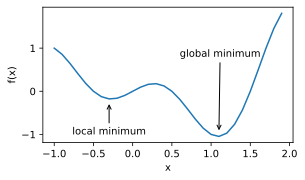

In [10]:
def f(x):
    return x * np.cos(np.pi * x)

test.set_figsize((4.5, 2.5))
x = np.arange(-1.0, 2.0, 0.1)
fig,  = test.plt.plot(x, f(x))
fig.axes.annotate('local minimum', xy=(-0.3, -0.25), xytext=(-0.77, -1.0),
                  arrowprops=dict(arrowstyle='->'))
fig.axes.annotate('global minimum', xy=(1.1, -0.95), xytext=(0.6, 0.8),
                  arrowprops=dict(arrowstyle='->'))
test.plt.xlabel('x')
test.plt.ylabel('f(x)');

### 7.1.2.2 鞍点

刚刚我们提到，梯度接近或变成零可能是由于当前解在局部最优解附近造成的。事实上，另一种可能性是当前解在鞍点（saddle point）附近。
再举个定义在二维空间的函数的例子，例如：

$$f(x, y) = x^2 - y^2.$$

我们可以找出该函数的鞍点位置。也许你已经发现了，该函数看起来像一个马鞍，而鞍点恰好是马鞍上可坐区域的中心。


Text(0.5, 0.5, 'y')

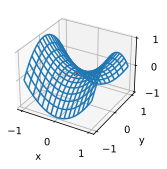

In [11]:
x, y = np.mgrid[-1: 1: 31j, -1: 1: 31j]
z = x**2 - y**2

ax = test.plt.figure().add_subplot(111, projection='3d')
ax.plot_wireframe(x, y, z, **{'rstride': 2, 'cstride': 2})
ax.plot([0], [0], [0], 'rx')
ticks = [-1,  0, 1]
test.plt.xticks(ticks)
test.plt.yticks(ticks)
ax.set_zticks(ticks)
test.plt.xlabel('x')
test.plt.ylabel('y')

在图的鞍点位置，目标函数在$x$轴方向上是局部最小值，但在$y$轴方向上是局部最大值。

假设一个函数的输入为$k$维向量，输出为标量，那么它的海森矩阵（Hessian matrix）有$k$个特征值。该函数在梯度为0的位置上可能是局部最小值、局部最大值或者鞍点。

* 当函数的海森矩阵在梯度为零的位置上的特征值全为正时，该函数得到局部最小值。
* 当函数的海森矩阵在梯度为零的位置上的特征值全为负时，该函数得到局部最大值。
* 当函数的海森矩阵在梯度为零的位置上的特征值有正有负时，该函数得到鞍点。

随机矩阵理论告诉我们，对于一个大的高斯随机矩阵来说，任一特征值是正或者是负的概率都是0.5 [1]。那么，以上第一种情况的概率为 $0.5^k$。由于深度学习模型参数通常都是高维的（$k$很大），目标函数的鞍点通常比局部最小值更常见。

在深度学习中，虽然找到目标函数的全局最优解很难，但这并非必要。我们将在本章接下来的几节中逐一介绍深度学习中常用的优化算法，它们在很多实际问题中都能够训练出十分有效的深度学习模型。


## 小结

* 由于优化算法的目标函数通常是一个基于训练数据集的损失函数，优化的目标在于降低训练误差。
* 由于深度学习模型参数通常都是高维的，目标函数的鞍点通常比局部最小值更常见。


# 7.2 梯度下降和随机梯度下降

在本节中，我们将介绍梯度下降（gradient descent）的工作原理。虽然梯度下降在深度学习中很少被直接使用，但理解梯度的意义以及沿着梯度反方向更新自变量可能降低目标函数值的原因是学习后续优化算法的基础。随后，我们将引出随机梯度下降（stochastic gradient descent）。

## 7.2.1 一维梯度下降

我们先以简单的一维梯度下降为例，解释梯度下降算法可能降低目标函数值的原因。假设连续可导的函数$f: \mathbb{R} \rightarrow \mathbb{R}$的输入和输出都是标量。给定绝对值足够小的数$\epsilon$，根据泰勒展开公式，我们得到以下的近似：

$$f(x + \epsilon) \approx f(x) + \epsilon f'(x) .$$

这里$f'(x)$是函数$f$在$x$处的梯度。一维函数的梯度是一个标量，也称导数。

接下来，找到一个常数$\eta > 0$，使得$\left|\eta f'(x)\right|$足够小，那么可以将$\epsilon$替换为$-\eta f'(x)$并得到

$$f(x - \eta f'(x)) \approx f(x) -  \eta f'(x)^2.$$

如果导数$f'(x) \neq 0$，那么$\eta f'(x)^2>0$，所以

$$f(x - \eta f'(x)) \lesssim f(x).$$

这意味着，如果通过

$$x \leftarrow x - \eta f'(x)$$

来迭代$x$，函数$f(x)$的值可能会降低。因此在梯度下降中，我们先选取一个初始值$x$和常数$\eta > 0$，然后不断通过上式来迭代$x$，直到达到停止条件，例如$f'(x)^2$的值已足够小或迭代次数已达到某个值。

下面我们以目标函数$f(x)=x^2$为例来看一看梯度下降是如何工作的。虽然我们知道最小化$f(x)$的解为$x=0$，这里依然使用这个简单函数来观察$x$是如何被迭代的。首先，导入本节实验所需的包或模块。

In [1]:
%matplotlib inline
import numpy as np
import torch
import math
import sys
sys.path.append("..") 
import hcy_test as test


In [15]:
def gd(eta):
    x = 10
    results = [x]
    for i in range(10):
        x -= eta * 2 * x  # f(x) = x * x的导数为f'(x) = 2 * x
        results.append(x)
    print('epoch 10, x:', x)
    return results

res = gd(0.2)

epoch 10, x: 0.06046617599999997


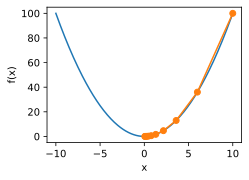

In [17]:
def show_trace(res):
    n = max(abs(min(res)), abs(max(res)), 10)
    f_line = np.arange(-n, n, 0.1)
    test.set_figsize()
    test.plt.plot(f_line, [x * x for x in f_line])
    test.plt.plot(res, [x * x for x in res], '-o')
    test.plt.xlabel('x')
    test.plt.ylabel('f(x)')

show_trace(res)

上述梯度下降算法中的正数$\eta$通常叫作学习率。这是一个超参数，需要人工设定。如果使用过小的学习率，会导致$x$更新缓慢从而需要更多的迭代才能得到较好的解。

下面展示使用学习率$\eta=0.05$时自变量$x$的迭代轨迹。可见，同样迭代10次后，当学习率过小时，最终$x$的值依然与最优解存在较大偏差。

epoch 10, x: 3.4867844009999995


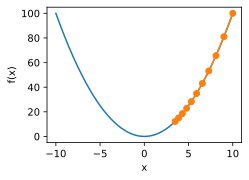

In [18]:
show_trace(gd(0.05))

如果使用过大的学习率，$\left|\eta f'(x)\right|$可能会过大从而使前面提到的一阶泰勒展开公式不再成立：这时我们无法保证迭代$x$会降低$f(x)$的值。

举个例子，当设学习率$\eta=1.1$时，可以看到$x$不断越过（overshoot）最优解$x=0$并逐渐发散。


epoch 10, x: 61.917364224000096


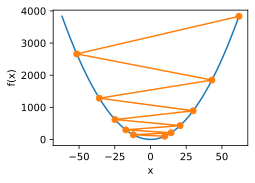

In [19]:
show_trace(gd(1.1))

## 7.2.3 多维梯度下降

在了解了一维梯度下降之后，我们再考虑一种更广义的情况：目标函数的输入为向量，输出为标量。假设目标函数$f: \mathbb{R}^d \rightarrow \mathbb{R}$的输入是一个$d$维向量$\boldsymbol{x} = [x_1, x_2, \ldots, x_d]^\top$。目标函数$f(\boldsymbol{x})$有关$\boldsymbol{x}$的梯度是一个由$d$个偏导数组成的向量：

$$\nabla_{\boldsymbol{x}} f(\boldsymbol{x}) = \bigg[\frac{\partial f(\boldsymbol{x})}{\partial x_1}, \frac{\partial f(\boldsymbol{x})}{\partial x_2}, \ldots, \frac{\partial f(\boldsymbol{x})}{\partial x_d}\bigg]^\top.$$


为表示简洁，我们用$\nabla f(\boldsymbol{x})$代替$\nabla_{\boldsymbol{x}} f(\boldsymbol{x})$。梯度中每个偏导数元素$\partial f(\boldsymbol{x})/\partial x_i$代表着$f$在$\boldsymbol{x}$有关输入$x_i$的变化率。为了测量$f$沿着单位向量$\boldsymbol{u}$（即$\|\boldsymbol{u}\|=1$）方向上的变化率，在多元微积分中，我们定义$f$在$\boldsymbol{x}$上沿着$\boldsymbol{u}$方向的方向导数为

$$\text{D}_{\boldsymbol{u}} f(\boldsymbol{x}) = \lim_{h \rightarrow 0}  \frac{f(\boldsymbol{x} + h \boldsymbol{u}) - f(\boldsymbol{x})}{h}.$$

依据方向导数性质[1，14.6节定理三]，以上方向导数可以改写为

$$\text{D}_{\boldsymbol{u}} f(\boldsymbol{x}) = \nabla f(\boldsymbol{x}) \cdot \boldsymbol{u}.$$

方向导数$\text{D}_{\boldsymbol{u}} f(\boldsymbol{x})$给出了$f$在$\boldsymbol{x}$上沿着所有可能方向的变化率。为了最小化$f$，我们希望找到$f$能被降低最快的方向。因此，我们可以通过单位向量$\boldsymbol{u}$来最小化方向导数$\text{D}_{\boldsymbol{u}} f(\boldsymbol{x})$。

由于$\text{D}_{\boldsymbol{u}} f(\boldsymbol{x}) = \|\nabla f(\boldsymbol{x})\| \cdot \|\boldsymbol{u}\|  \cdot \text{cos} (\theta) = \|\nabla f(\boldsymbol{x})\|  \cdot \text{cos} (\theta)$，
其中$\theta$为梯度$\nabla f(\boldsymbol{x})$和单位向量$\boldsymbol{u}$之间的夹角，当$\theta = \pi$时，$\text{cos}(\theta)$取得最小值$-1$。因此，当$\boldsymbol{u}$在梯度方向$\nabla f(\boldsymbol{x})$的相反方向时，方向导数$\text{D}_{\boldsymbol{u}} f(\boldsymbol{x})$被最小化。因此，我们可能通过梯度下降算法来不断降低目标函数$f$的值：

$$\boldsymbol{x} \leftarrow \boldsymbol{x} - \eta \nabla f(\boldsymbol{x}).$$

同样，其中$\eta$（取正数）称作学习率。

下面我们构造一个输入为二维向量$\boldsymbol{x} = [x_1, x_2]^\top$和输出为标量的目标函数$f(\boldsymbol{x})=x_1^2+2x_2^2$。那么，梯度$\nabla f(\boldsymbol{x}) = [2x_1, 4x_2]^\top$。我们将观察梯度下降从初始位置$[-5,-2]$开始对自变量$\boldsymbol{x}$的迭代轨迹。我们先定义两个辅助函数，第一个函数使用给定的自变量更新函数，从初始位置$[-5,-2]$开始迭代自变量$\boldsymbol{x}$共20次，第二个函数对自变量$\boldsymbol{x}$的迭代轨迹进行可视化。

epoch 20, x1 -0.057646, x2 -0.000073


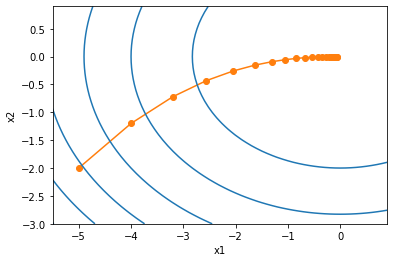

In [2]:
eta = 0.1

def f_2d(x1, x2):  # 目标函数
    return x1 ** 2 + 2 * x2 ** 2

def gd_2d(x1, x2, s1, s2):
    return (x1 - eta * 2 * x1, x2 - eta * 4 * x2, 0, 0)

test.show_trace_2d(f_2d, test.train_2d(gd_2d))

## 7.2.4 随机梯度下降

在深度学习里，目标函数通常是训练数据集中有关各个样本的损失函数的平均。设$f_i(\boldsymbol{x})$是有关索引为$i$的训练数据样本的损失函数，$n$是训练数据样本数，$\boldsymbol{x}$是模型的参数向量，那么目标函数定义为

$$f(\boldsymbol{x}) = \frac{1}{n} \sum_{i = 1}^n f_i(\boldsymbol{x}).$$

目标函数在$\boldsymbol{x}$处的梯度计算为

$$\nabla f(\boldsymbol{x}) = \frac{1}{n} \sum_{i = 1}^n \nabla f_i(\boldsymbol{x}).$$

如果使用梯度下降，每次自变量迭代的计算开销为$\mathcal{O}(n)$，它随着$n$线性增长。因此，当训练数据样本数很大时，梯度下降每次迭代的计算开销很高。

随机梯度下降（stochastic gradient descent，SGD）减少了每次迭代的计算开销。在随机梯度下降的每次迭代中，我们随机均匀采样的一个样本索引$i\in\{1,\ldots,n\}$，并计算梯度$\nabla f_i(\boldsymbol{x})$来迭代$\boldsymbol{x}$：

$$\boldsymbol{x} \leftarrow \boldsymbol{x} - \eta \nabla f_i(\boldsymbol{x}).$$

这里$\eta$同样是学习率。可以看到每次迭代的计算开销从梯度下降的$\mathcal{O}(n)$降到了常数$\mathcal{O}(1)$。值得强调的是，随机梯度$\nabla f_i(\boldsymbol{x})$是对梯度$\nabla f(\boldsymbol{x})$的无偏估计：

$$E_i \nabla f_i(\boldsymbol{x}) = \frac{1}{n} \sum_{i = 1}^n \nabla f_i(\boldsymbol{x}) = \nabla f(\boldsymbol{x}).$$

这意味着，平均来说，随机梯度是对梯度的一个良好的估计。

下面我们通过在梯度中添加均值为0的随机噪声来模拟随机梯度下降，以此来比较它与梯度下降的区别。

epoch 20, x1 -0.096322, x2 -0.148594


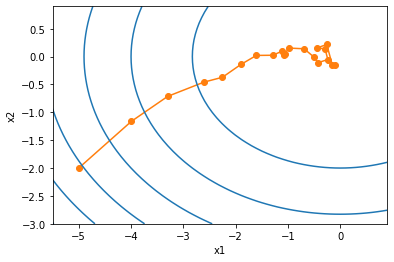

In [3]:
def sgd_2d(x1, x2, s1, s2):
    return (x1 - eta * (2 * x1 + np.random.normal(0.1)),
            x2 - eta * (4 * x2 + np.random.normal(0.1)), 0, 0)

test.show_trace_2d(f_2d, test.train_2d(sgd_2d))

# 7.3 小批量随机梯度下降

在每一次迭代中，梯度下降使用整个训练数据集来计算梯度，因此它有时也被称为批量梯度下降（batch gradient descent）。而随机梯度下降在每次迭代中只随机采样一个样本来计算梯度。正如我们在前几章中所看到的，我们还可以在每轮迭代中随机均匀采样多个样本来组成一个小批量，然后使用这个小批量来计算梯度。下面就来描述小批量随机梯度下降。


设目标函数$f(\boldsymbol{x}): \mathbb{R}^d \rightarrow \mathbb{R}$。在迭代开始前的时间步设为0。该时间步的自变量记为$\boldsymbol{x}_0\in \mathbb{R}^d$，通常由随机初始化得到。在接下来的每一个时间步$t>0$中，小批量随机梯度下降随机均匀采样一个由训练数据样本索引组成的小批量$\mathcal{B}_t$。我们可以通过重复采样（sampling with replacement）或者不重复采样（sampling without replacement）得到一个小批量中的各个样本。前者允许同一个小批量中出现重复的样本，后者则不允许如此，且更常见。对于这两者间的任一种方式，都可以使用

$$
\boldsymbol{g}_t \leftarrow \nabla f_{\mathcal{B}_t}(\boldsymbol{x}_{t-1}) = \frac{1}{|\mathcal{B}|} \sum_{i \in \mathcal{B}_t}\nabla f_i(\boldsymbol{x}_{t-1})
$$

来计算时间步$t$的小批量$\mathcal{B}_t$上目标函数位于$\boldsymbol{x}_{t-1}$处的梯度$\boldsymbol{g}_t$。这里$|\mathcal{B}|$代表批量大小，即小批量中样本的个数，是一个超参数。同随机梯度一样，重复采样所得的小批量随机梯度$\boldsymbol{g}_t$也是对梯度$\nabla f(\boldsymbol{x}_{t-1})$的无偏估计。给定学习率$\eta_t$（取正数），小批量随机梯度下降对自变量的迭代如下：

$$\boldsymbol{x}_t \leftarrow \boldsymbol{x}_{t-1} - \eta_t \boldsymbol{g}_t.$$

基于随机采样得到的梯度的方差在迭代过程中无法减小，因此在实际中，（小批量）随机梯度下降的学习率可以在迭代过程中自我衰减，例如$\eta_t=\eta t^\alpha$（通常$\alpha=-1$或者$-0.5$）、$\eta_t = \eta \alpha^t$（如$\alpha=0.95$）或者每迭代若干次后将学习率衰减一次。如此一来，学习率和（小批量）随机梯度乘积的方差会减小。而梯度下降在迭代过程中一直使用目标函数的真实梯度，无须自我衰减学习率。


小批量随机梯度下降中每次迭代的计算开销为$\mathcal{O}(|\mathcal{B}|)$。当批量大小为1时，该算法即为随机梯度下降；当批量大小等于训练数据样本数时，该算法即为梯度下降。当批量较小时，每次迭代中使用的样本少，这会导致并行处理和内存使用效率变低。这使得在计算同样数目样本的情况下比使用更大批量时所花时间更多。当批量较大时，每个小批量梯度里可能含有更多的冗余信息。为了得到较好的解，批量较大时比批量较小时需要计算的样本数目可能更多，例如增大迭代周期数。


## 7.3.1 读取数据

本章里我们将使用一个来自NASA的测试不同飞机机翼噪音的数据集来比较各个优化算法 [1]。我们使用该数据集的前1,500个样本和5个特征，并使用标准化对数据进行预处理。

In [1]:
%matplotlib inline
import numpy as np
import time
import torch
from torch import nn, optim
import sys
sys.path.append("..") 
import hcy_test as test


features, labels = test.get_data('data/airfoil_self_noise.dat')
features.shape # torch.Size([1500, 5])

torch.Size([1500, 5])

## 7.3.2 从零开始实现

3.2节（线性回归的从零开始实现）中已经实现过小批量随机梯度下降算法。我们在这里将它的输入参数变得更加通用，主要是为了方便本章后面介绍的其他优化算法也可以使用同样的输入。具体来说，我们添加了一个状态输入`states`并将超参数放在字典`hyperparams`里。此外，我们将在训练函数里对各个小批量样本的损失求平均，因此优化算法里的梯度不需要除以批量大小。

loss: 0.242913, 0.012560 sec per epoch


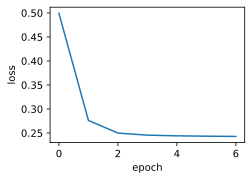

In [3]:
def sgd(params, states, hyperparams):
    for p in params:
        p.data -= hyperparams['lr'] * p.grad.data
def train_sgd(lr, batch_size, num_epochs=2):
    test.train_optim_module(sgd, None, {'lr': lr}, features, labels, batch_size, num_epochs)

train_sgd(1, 1500, 6)

loss: 0.245565, 0.327509 sec per epoch


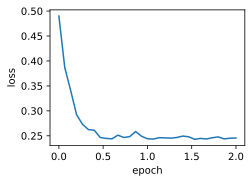

In [4]:
train_sgd(0.005, 1)

In [5]:
# 本函数与原书不同的是这里第一个参数优化器函数而不是优化器的名字
# 例如: optimizer_fn=torch.optim.SGD, optimizer_hyperparams={"lr": 0.05}
def train_pytorch_ch7(optimizer_fn, optimizer_hyperparams, features, labels,
                    batch_size=10, num_epochs=2):
    # 初始化模型
    net = nn.Sequential(
        nn.Linear(features.shape[-1], 1)
    )
    loss = nn.MSELoss()
    optimizer = optimizer_fn(net.parameters(), **optimizer_hyperparams)

    def eval_loss():
        return loss(net(features).view(-1), labels).item() / 2

    ls = [eval_loss()]
    data_iter = torch.utils.data.DataLoader(
        torch.utils.data.TensorDataset(features, labels), batch_size, shuffle=True)

    for _ in range(num_epochs):
        start = time.time()
        for batch_i, (X, y) in enumerate(data_iter):
            
            l = loss(net(X).view(-1), y) / 2 
            
            optimizer.zero_grad()
            l.backward()
            optimizer.step()
            if (batch_i + 1) * batch_size % 100 == 0:
                ls.append(eval_loss())
    # 打印结果和作图
    print('loss: %f, %f sec per epoch' % (ls[-1], time.time() - start))
    test.set_figsize()
    test.plt.plot(np.linspace(0, num_epochs, len(ls)), ls)
    test.plt.xlabel('epoch')
    test.plt.ylabel('loss')

loss: 0.242698, 0.046608 sec per epoch


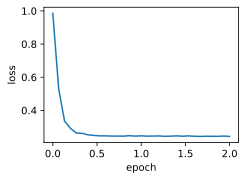

In [6]:
train_pytorch_ch7(optim.SGD, {"lr": 0.05}, features, labels, 10)